# Setup เริ่มต้น

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import locale
locale.getpreferredencoding = lambda: "UTF-8"

from IPython.display import display, Image

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!mkdir '/content/gdrive/MyDrive/032-Lab09'

In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/032-Lab09')

In [ ]:
!pwd

/content/gdrive/MyDrive/032-Lab09


In [ ]:
from google.colab import files
files.upload()

Saving star-finger.zip to star-finger.zip


In [ ]:
!unzip star-finger.zip -d star-finger-Dataset
from IPython import display
display.clear_output()

In [ ]:
!ls

Lab09.ipynb  star-finger-Dataset  star-finger.zip


In [ ]:
os.chdir('/content/gdrive/MyDrive/032-Lab09/star-finger-Dataset')
!pwd

/content/gdrive/MyDrive/032-Lab09/star-finger-Dataset


In [ ]:
!pip install ultralytics
from IPython import display
display.clear_output()

# Train model

In [ ]:
from ultralytics import YOLO
import os

path_dataset = os.path.join(os.getcwd(), "data.yaml")

# Load a pretrained YOLO model (recommended for training)
model = YOLO("yolov8n.pt")

# Train the model using the 'data.yaml'
model.train(data=path_dataset, imgsz=640, epochs=50, batch=8, name='star-finger-yolov8n_50e', device=0)

# Evaluate the model's performance on the validation set
model.val()

# Export the model to ONNX format
model.export(format='onnx')

100%|██████████| 6.23M/6.23M [00:00<00:00, 25.5MB/s]


Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/032-Lab09/star-finger-Dataset/data.yaml, epochs=50, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=star-finger-yolov8n_50e, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 5.14MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/gdrive/MyDrive/032-Lab09/star-finger-Dataset/train/labels... 1209 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1209/1209 [00:02<00:00, 470.47it/s]


train: New cache created: /content/gdrive/MyDrive/032-Lab09/star-finger-Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/gdrive/MyDrive/032-Lab09/star-finger-Dataset/valid/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 285.58it/s]


val: New cache created: /content/gdrive/MyDrive/032-Lab09/star-finger-Dataset/valid/labels.cache
Plotting labels to runs/detect/star-finger-yolov8n_50e/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/star-finger-yolov8n_50e
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.21G      1.215      3.318      1.425          4        640: 100%|██████████| 152/152 [00:16<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]

                   all        100        132      0.393      0.543      0.434      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.24G      1.156      2.553      1.325          4        640: 100%|██████████| 152/152 [00:13<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.28it/s]


                   all        100        132       0.65        0.4       0.55      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.24G      1.159      2.237      1.327          6        640: 100%|██████████| 152/152 [00:13<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  8.79it/s]


                   all        100        132      0.669      0.655      0.735      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.24G      1.112      1.991      1.304          5        640: 100%|██████████| 152/152 [00:13<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.09it/s]

                   all        100        132      0.738      0.666      0.737      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.24G      1.132      1.873      1.308          3        640: 100%|██████████| 152/152 [00:13<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.29it/s]

                   all        100        132      0.792      0.726      0.831      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.24G      1.081       1.69      1.278          4        640: 100%|██████████| 152/152 [00:13<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.62it/s]

                   all        100        132      0.806      0.693      0.862      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.24G      1.044      1.539      1.238          1        640: 100%|██████████| 152/152 [00:13<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.40it/s]

                   all        100        132      0.842      0.746      0.864      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.24G      1.008      1.427      1.221          1        640: 100%|██████████| 152/152 [00:13<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.73it/s]

                   all        100        132      0.824      0.783      0.893      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.24G     0.9921      1.368      1.212          1        640: 100%|██████████| 152/152 [00:13<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.86it/s]

                   all        100        132      0.839      0.843      0.927      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.24G     0.9735      1.309      1.203          2        640: 100%|██████████| 152/152 [00:13<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.64it/s]

                   all        100        132      0.843       0.83      0.913      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.24G     0.9703      1.276      1.209          4        640: 100%|██████████| 152/152 [00:13<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.30it/s]

                   all        100        132      0.876      0.862      0.922       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.24G     0.9302      1.168      1.165          2        640: 100%|██████████| 152/152 [00:13<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.90it/s]

                   all        100        132      0.937      0.828      0.916      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.24G     0.9216      1.151      1.165         15        640: 100%|██████████| 152/152 [00:13<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.71it/s]

                   all        100        132      0.944      0.852      0.944      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.24G     0.8994       1.12      1.163          2        640: 100%|██████████| 152/152 [00:13<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.52it/s]

                   all        100        132      0.946      0.873      0.942       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.24G     0.8907       1.09      1.153          1        640: 100%|██████████| 152/152 [00:13<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.34it/s]

                   all        100        132      0.933      0.875       0.95      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.24G     0.8738      1.031      1.132          2        640: 100%|██████████| 152/152 [00:13<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.69it/s]

                   all        100        132      0.887      0.884      0.944      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.24G     0.8755      1.004       1.15          1        640: 100%|██████████| 152/152 [00:13<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.86it/s]

                   all        100        132      0.942      0.928      0.955      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.24G     0.8572     0.9946      1.132          2        640: 100%|██████████| 152/152 [00:13<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.57it/s]

                   all        100        132      0.937      0.907       0.97      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.24G      0.837     0.9821      1.117          3        640: 100%|██████████| 152/152 [00:13<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.65it/s]

                   all        100        132      0.979       0.92      0.977        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.24G     0.8435     0.9254       1.12          1        640: 100%|██████████| 152/152 [00:13<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.76it/s]

                   all        100        132      0.933      0.923      0.971      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.24G     0.8064     0.8961      1.101          2        640: 100%|██████████| 152/152 [00:13<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.59it/s]

                   all        100        132      0.924      0.933      0.974      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.24G     0.8166     0.8952      1.105          8        640: 100%|██████████| 152/152 [00:13<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.91it/s]

                   all        100        132      0.965       0.91      0.966      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.24G        0.8     0.8792      1.098          5        640: 100%|██████████| 152/152 [00:13<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.72it/s]

                   all        100        132      0.979      0.956      0.979      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.24G     0.8044     0.8394      1.095          3        640: 100%|██████████| 152/152 [00:13<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.90it/s]

                   all        100        132      0.936      0.918       0.96      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.24G     0.7874     0.8519      1.102          8        640: 100%|██████████| 152/152 [00:13<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.81it/s]

                   all        100        132       0.97      0.933      0.974      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.24G     0.7759     0.8122      1.072          4        640: 100%|██████████| 152/152 [00:13<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.71it/s]

                   all        100        132      0.981      0.927      0.978      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.24G     0.7577     0.8102      1.084          3        640: 100%|██████████| 152/152 [00:13<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.88it/s]

                   all        100        132       0.95      0.955      0.981      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.24G     0.7736     0.7878      1.092          1        640: 100%|██████████| 152/152 [00:13<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.96it/s]

                   all        100        132      0.973       0.94      0.973      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.24G     0.7782     0.7987      1.081          2        640: 100%|██████████| 152/152 [00:13<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.61it/s]

                   all        100        132      0.967      0.911      0.979      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.24G     0.7379     0.7357      1.059          5        640: 100%|██████████| 152/152 [00:13<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.04it/s]

                   all        100        132      0.947      0.926       0.98      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.24G     0.7303     0.7416      1.044          0        640: 100%|██████████| 152/152 [00:13<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.48it/s]

                   all        100        132      0.977      0.927      0.978      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.24G     0.7117     0.7146      1.045          2        640: 100%|██████████| 152/152 [00:13<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.90it/s]

                   all        100        132      0.954      0.939      0.976      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.24G      0.705     0.7166      1.038          1        640: 100%|██████████| 152/152 [00:13<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.50it/s]

                   all        100        132       0.97      0.938      0.979      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.24G     0.6979     0.7218      1.049          5        640: 100%|██████████| 152/152 [00:13<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.78it/s]

                   all        100        132      0.985      0.915      0.987      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.24G     0.6928     0.6934      1.031          1        640: 100%|██████████| 152/152 [00:13<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.64it/s]

                   all        100        132      0.941      0.942      0.978      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.24G     0.6967     0.6803      1.035          2        640: 100%|██████████| 152/152 [00:13<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.67it/s]

                   all        100        132      0.961      0.929      0.982      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.24G      0.687     0.6548      1.035          4        640: 100%|██████████| 152/152 [00:13<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00, 10.06it/s]

                   all        100        132      0.991      0.927      0.985      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.24G      0.687     0.6596      1.034          4        640: 100%|██████████| 152/152 [00:13<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.73it/s]

                   all        100        132      0.971       0.96      0.987      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.24G     0.6809     0.6516      1.032          2        640: 100%|██████████| 152/152 [00:13<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.69it/s]

                   all        100        132      0.979      0.963      0.982      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.24G     0.6805     0.6414      1.022          2        640: 100%|██████████| 152/152 [00:13<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.52it/s]

                   all        100        132       0.98      0.968      0.987      0.851


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.37G     0.5353     0.4358     0.9276          2        640: 100%|██████████| 152/152 [00:14<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.43it/s]

                   all        100        132      0.986      0.963      0.988      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.24G     0.5221     0.4127     0.9251          3        640: 100%|██████████| 152/152 [00:13<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.20it/s]

                   all        100        132      0.981      0.943      0.986      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.24G     0.5064     0.3889     0.9183          1        640: 100%|██████████| 152/152 [00:13<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.38it/s]

                   all        100        132      0.948      0.965      0.984      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.24G     0.5007     0.3754     0.9073          1        640: 100%|██████████| 152/152 [00:13<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.39it/s]

                   all        100        132      0.985      0.968      0.986      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.24G     0.4982      0.376     0.9069          1        640: 100%|██████████| 152/152 [00:13<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.73it/s]

                   all        100        132      0.978      0.946      0.984      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.24G     0.5014      0.374     0.9231          1        640: 100%|██████████| 152/152 [00:13<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.77it/s]

                   all        100        132      0.984      0.965      0.987      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.24G     0.4708     0.3525     0.8933          2        640: 100%|██████████| 152/152 [00:13<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.70it/s]

                   all        100        132      0.972      0.969      0.985      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.24G     0.4636     0.3436     0.8917          1        640: 100%|██████████| 152/152 [00:13<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.65it/s]

                   all        100        132      0.975      0.965      0.987       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.24G     0.4539     0.3292     0.8827          1        640: 100%|██████████| 152/152 [00:13<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.47it/s]

                   all        100        132      0.966      0.958      0.987      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.24G     0.4524     0.3336     0.8955          1        640: 100%|██████████| 152/152 [00:13<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<00:00,  9.26it/s]

                   all        100        132      0.987      0.948      0.988      0.857



50 epochs completed in 0.206 hours.
Optimizer stripped from runs/detect/star-finger-yolov8n_50e/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/star-finger-yolov8n_50e/weights/best.pt, 6.3MB

Validating runs/detect/star-finger-yolov8n_50e/weights/best.pt...
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]


                   all        100        132      0.966      0.964      0.988      0.856
            Mini-heart        100         26       0.95      0.923      0.966      0.799
               Ok-hand        100         21      0.939          1      0.995      0.895
                 Peace        100         27          1      0.926      0.989      0.885
           Thumbs-down        100         24      0.984          1      0.995      0.861
             Thumbs-up        100         34      0.956      0.971      0.993      0.839
Speed: 0.7ms preprocess, 15.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/star-finger-yolov8n_50e
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/gdrive/MyDrive/032-Lab09/star-finger-Dataset/valid/labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.46it/s]


                   all        100        132      0.988      0.947      0.988      0.857
            Mini-heart        100         26          1       0.87      0.966        0.8
               Ok-hand        100         21      0.962          1      0.995      0.899
                 Peace        100         27          1      0.897      0.989      0.885
           Thumbs-down        100         24      0.999          1      0.995      0.862
             Thumbs-up        100         34      0.976      0.971      0.993      0.838
Speed: 0.3ms preprocess, 8.3ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to runs/detect/star-finger-yolov8n_50e2
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

PyTorch: starting from 'runs/detect/star-finger-yolov8n_50e/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 9, 8400) (6.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUp

'runs/detect/star-finger-yolov8n_50e/weights/best.onnx'

# ผลลัพท์ของ model

In [ ]:
!ls runs/detect/star-finger-yolov8n_50e/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1702909849.22fd928898ef.5022.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch6080.jpg  weights
P_curve.png					    train_batch6081.jpg
PR_curve.png					    train_batch6082.jpg


In [ ]:
from IPython.display import display, Image

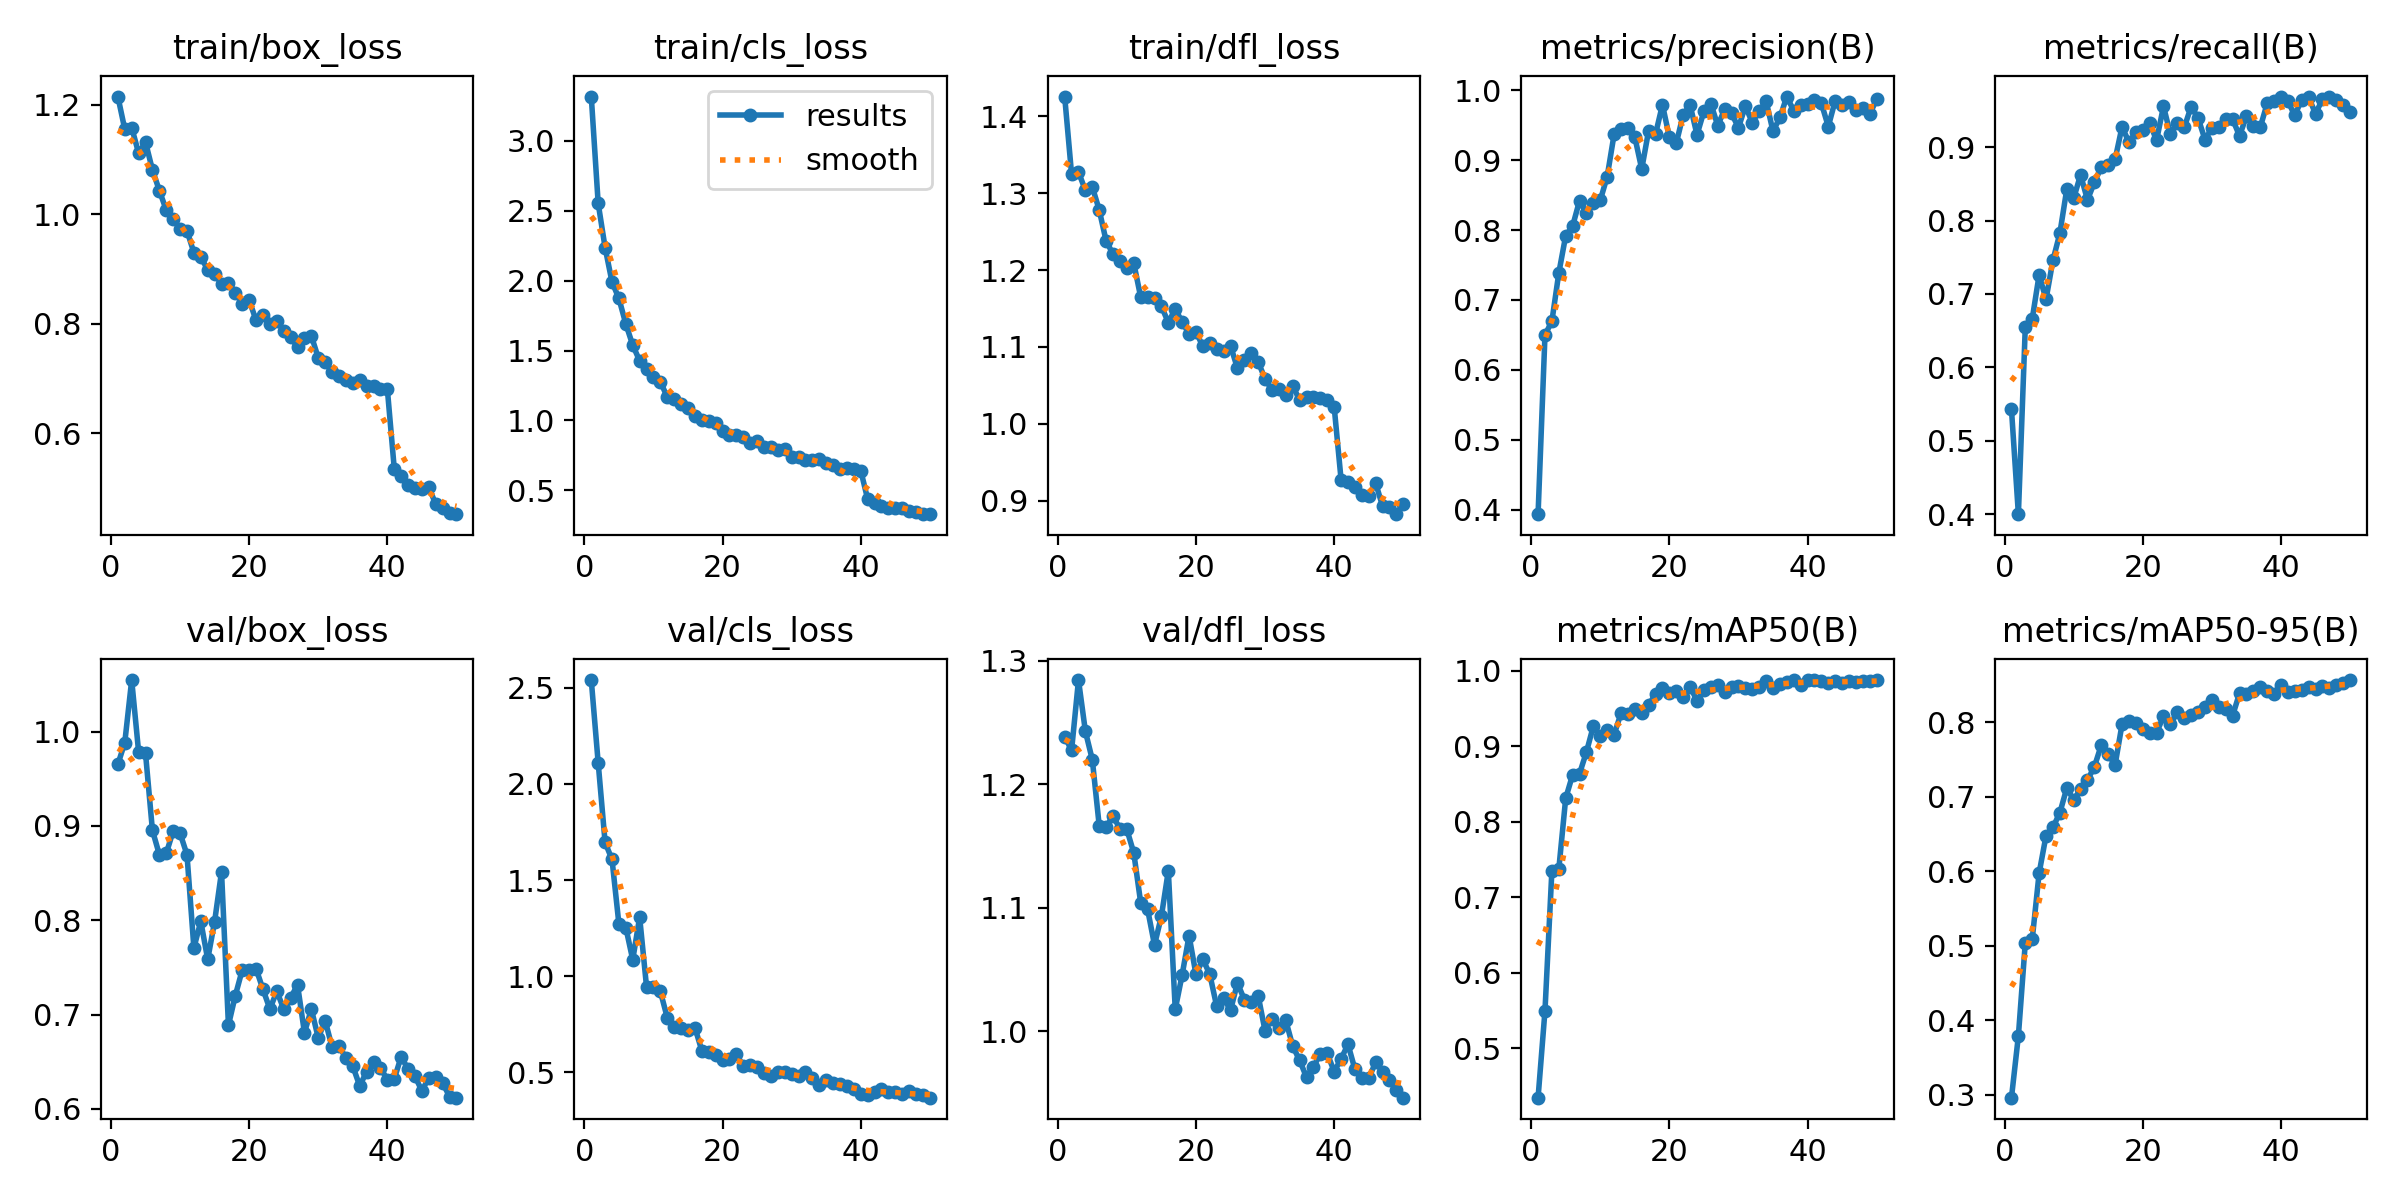

In [ ]:
Image(filename='runs/detect/star-finger-yolov8n_50e/results.png', width=900)

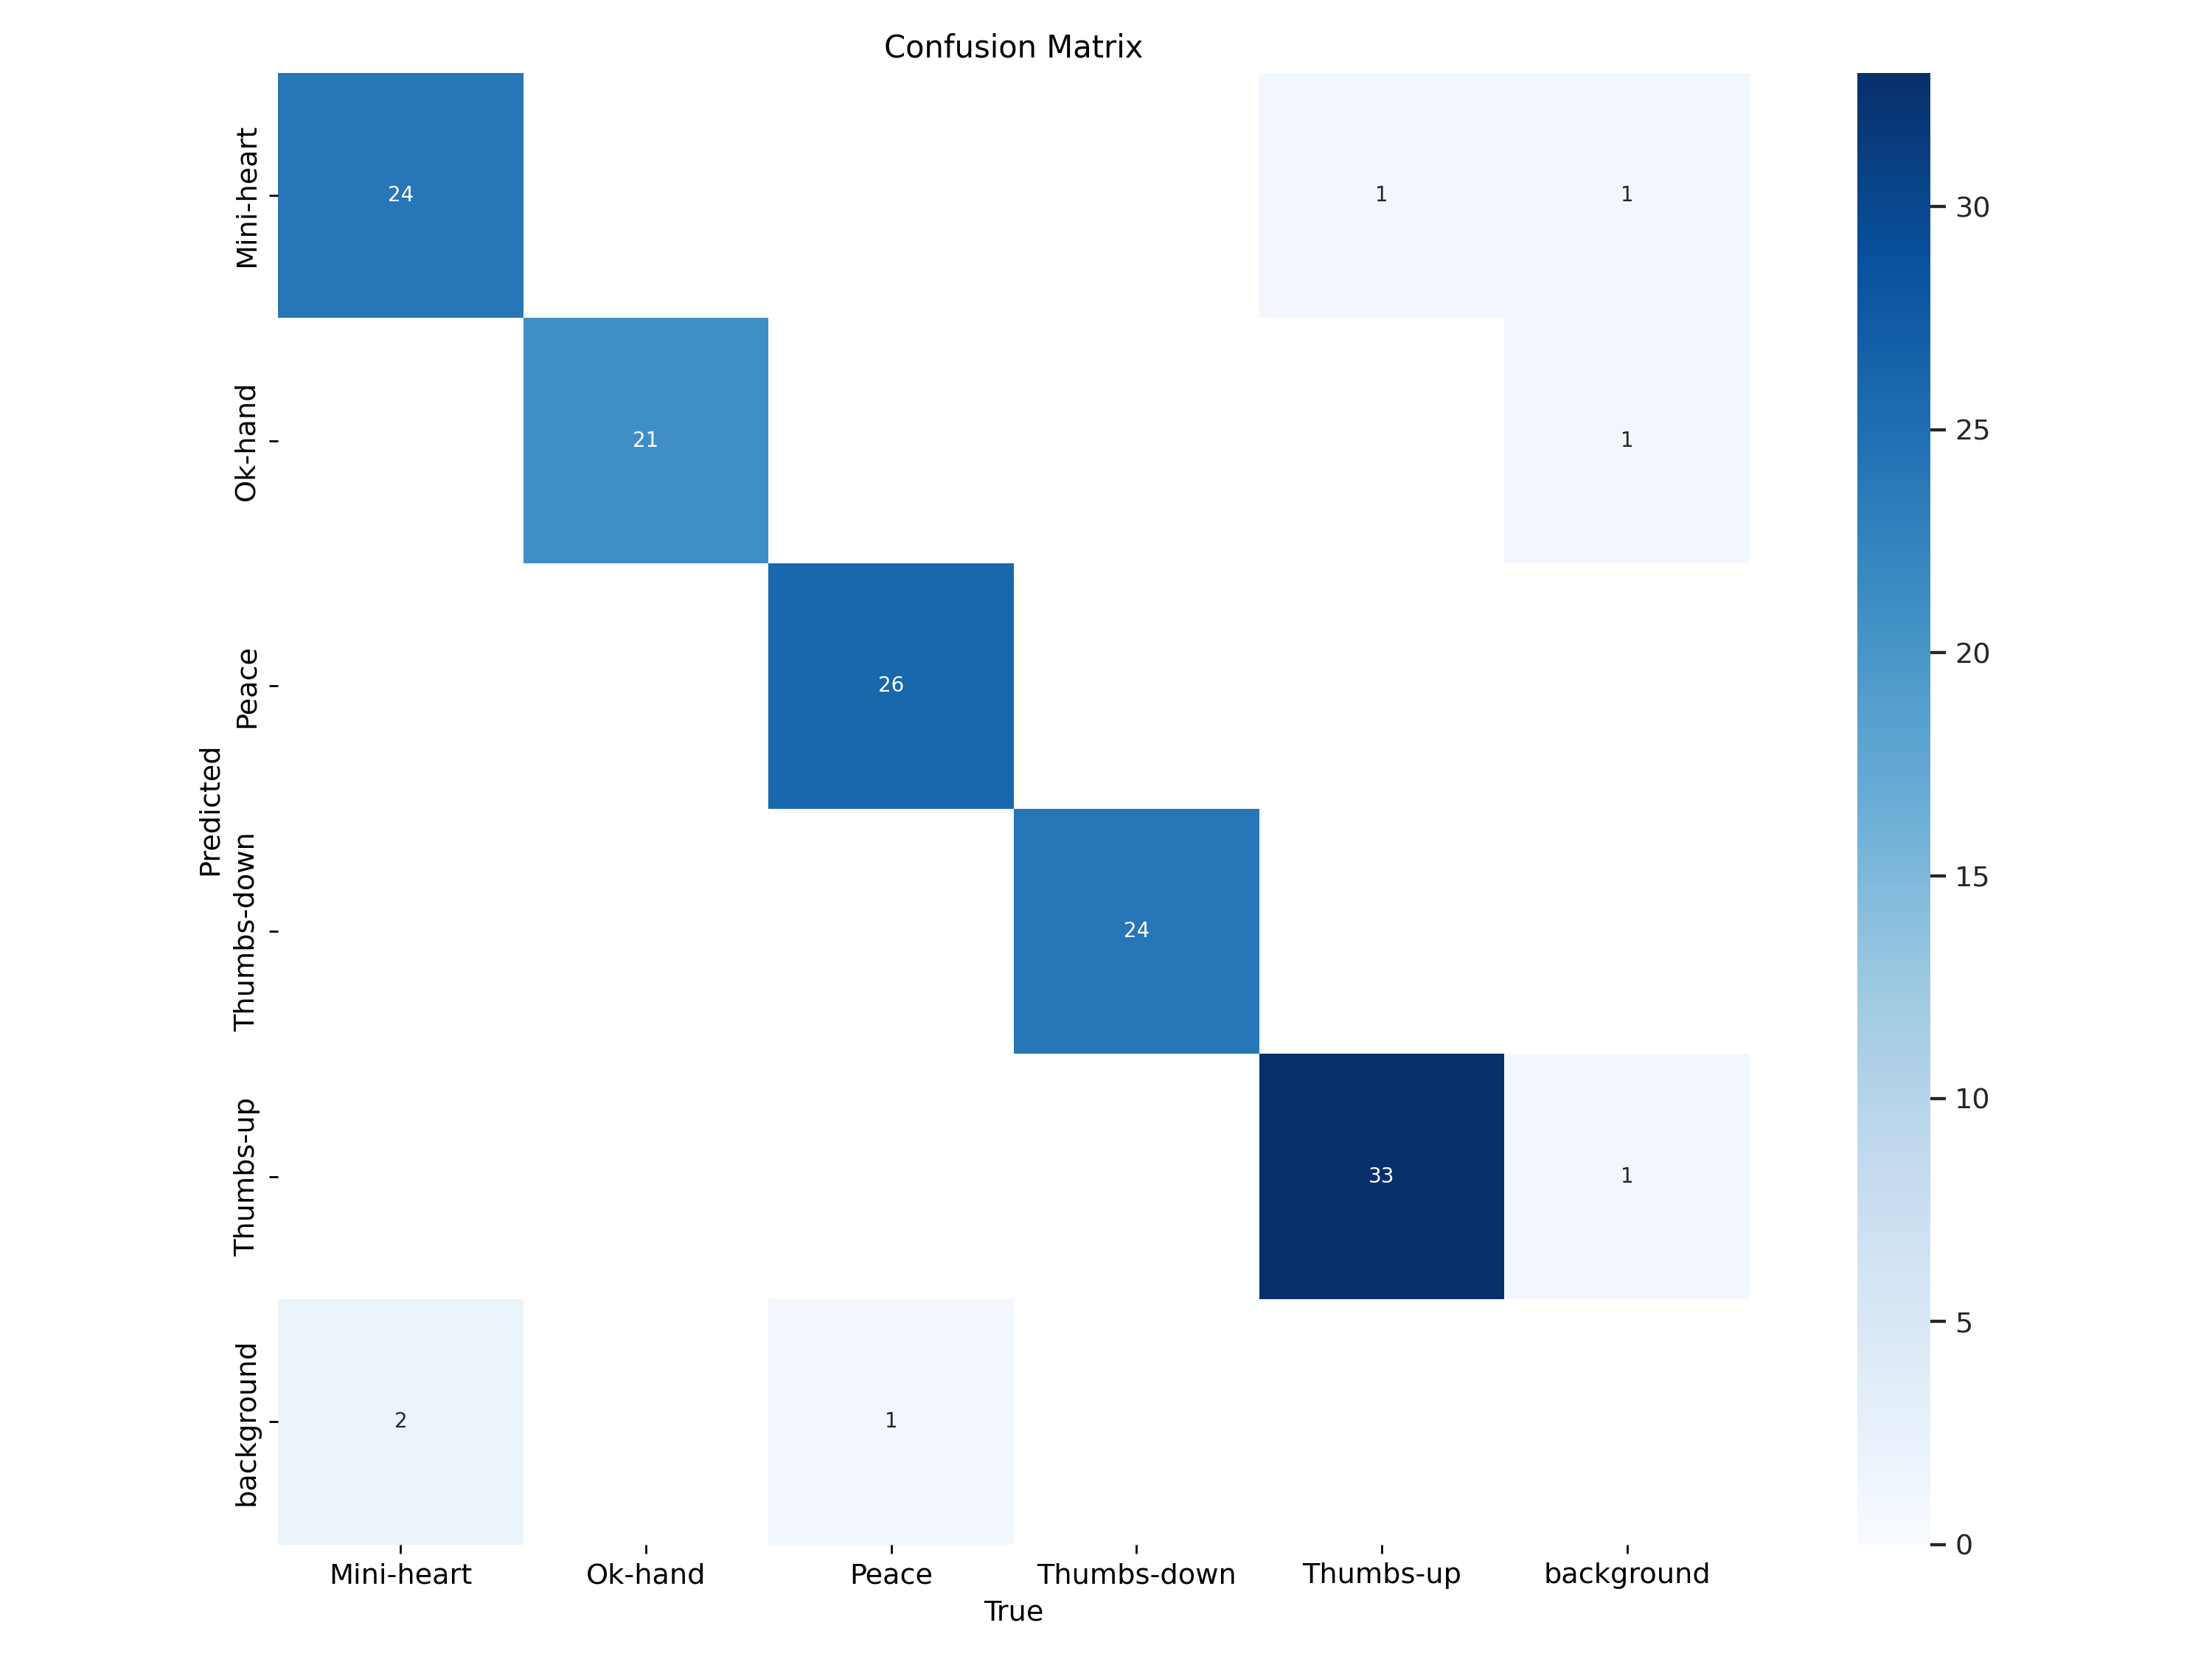

In [ ]:
Image(filename='runs/detect/star-finger-yolov8n_50e/confusion_matrix.png', width=900)

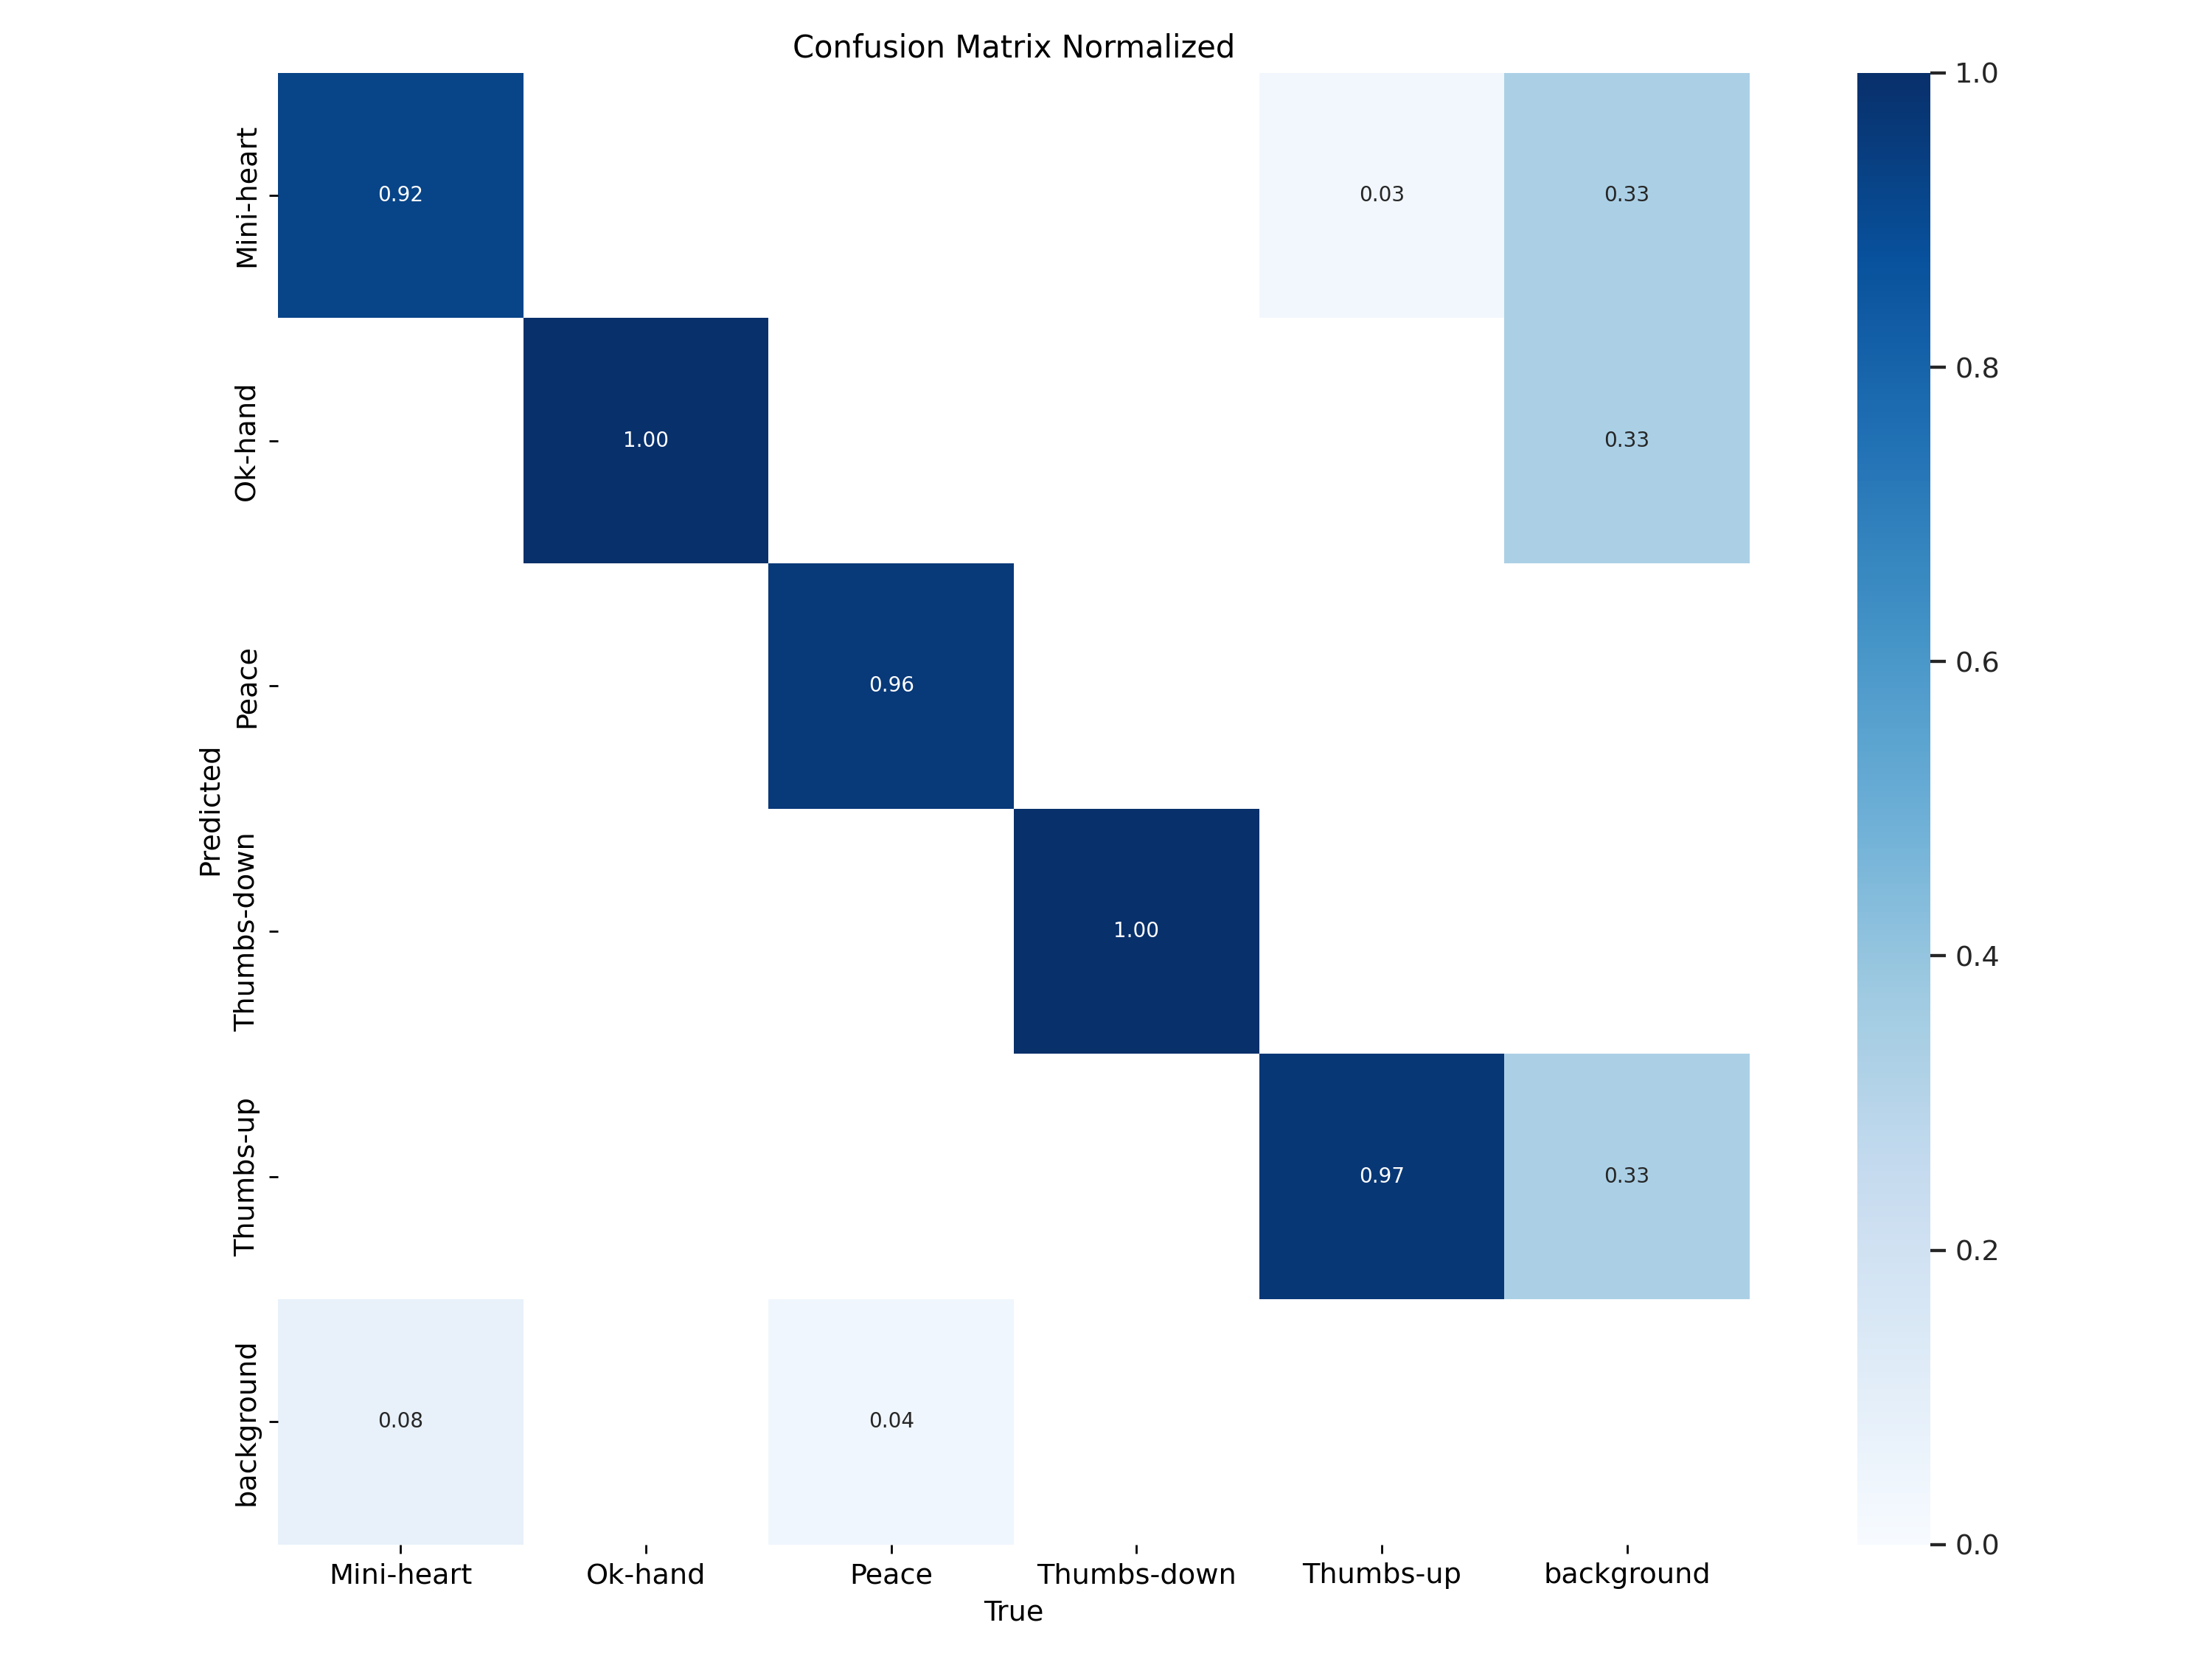

In [ ]:
Image(filename='runs/detect/star-finger-yolov8n_50e/confusion_matrix_normalized.png', width=900)

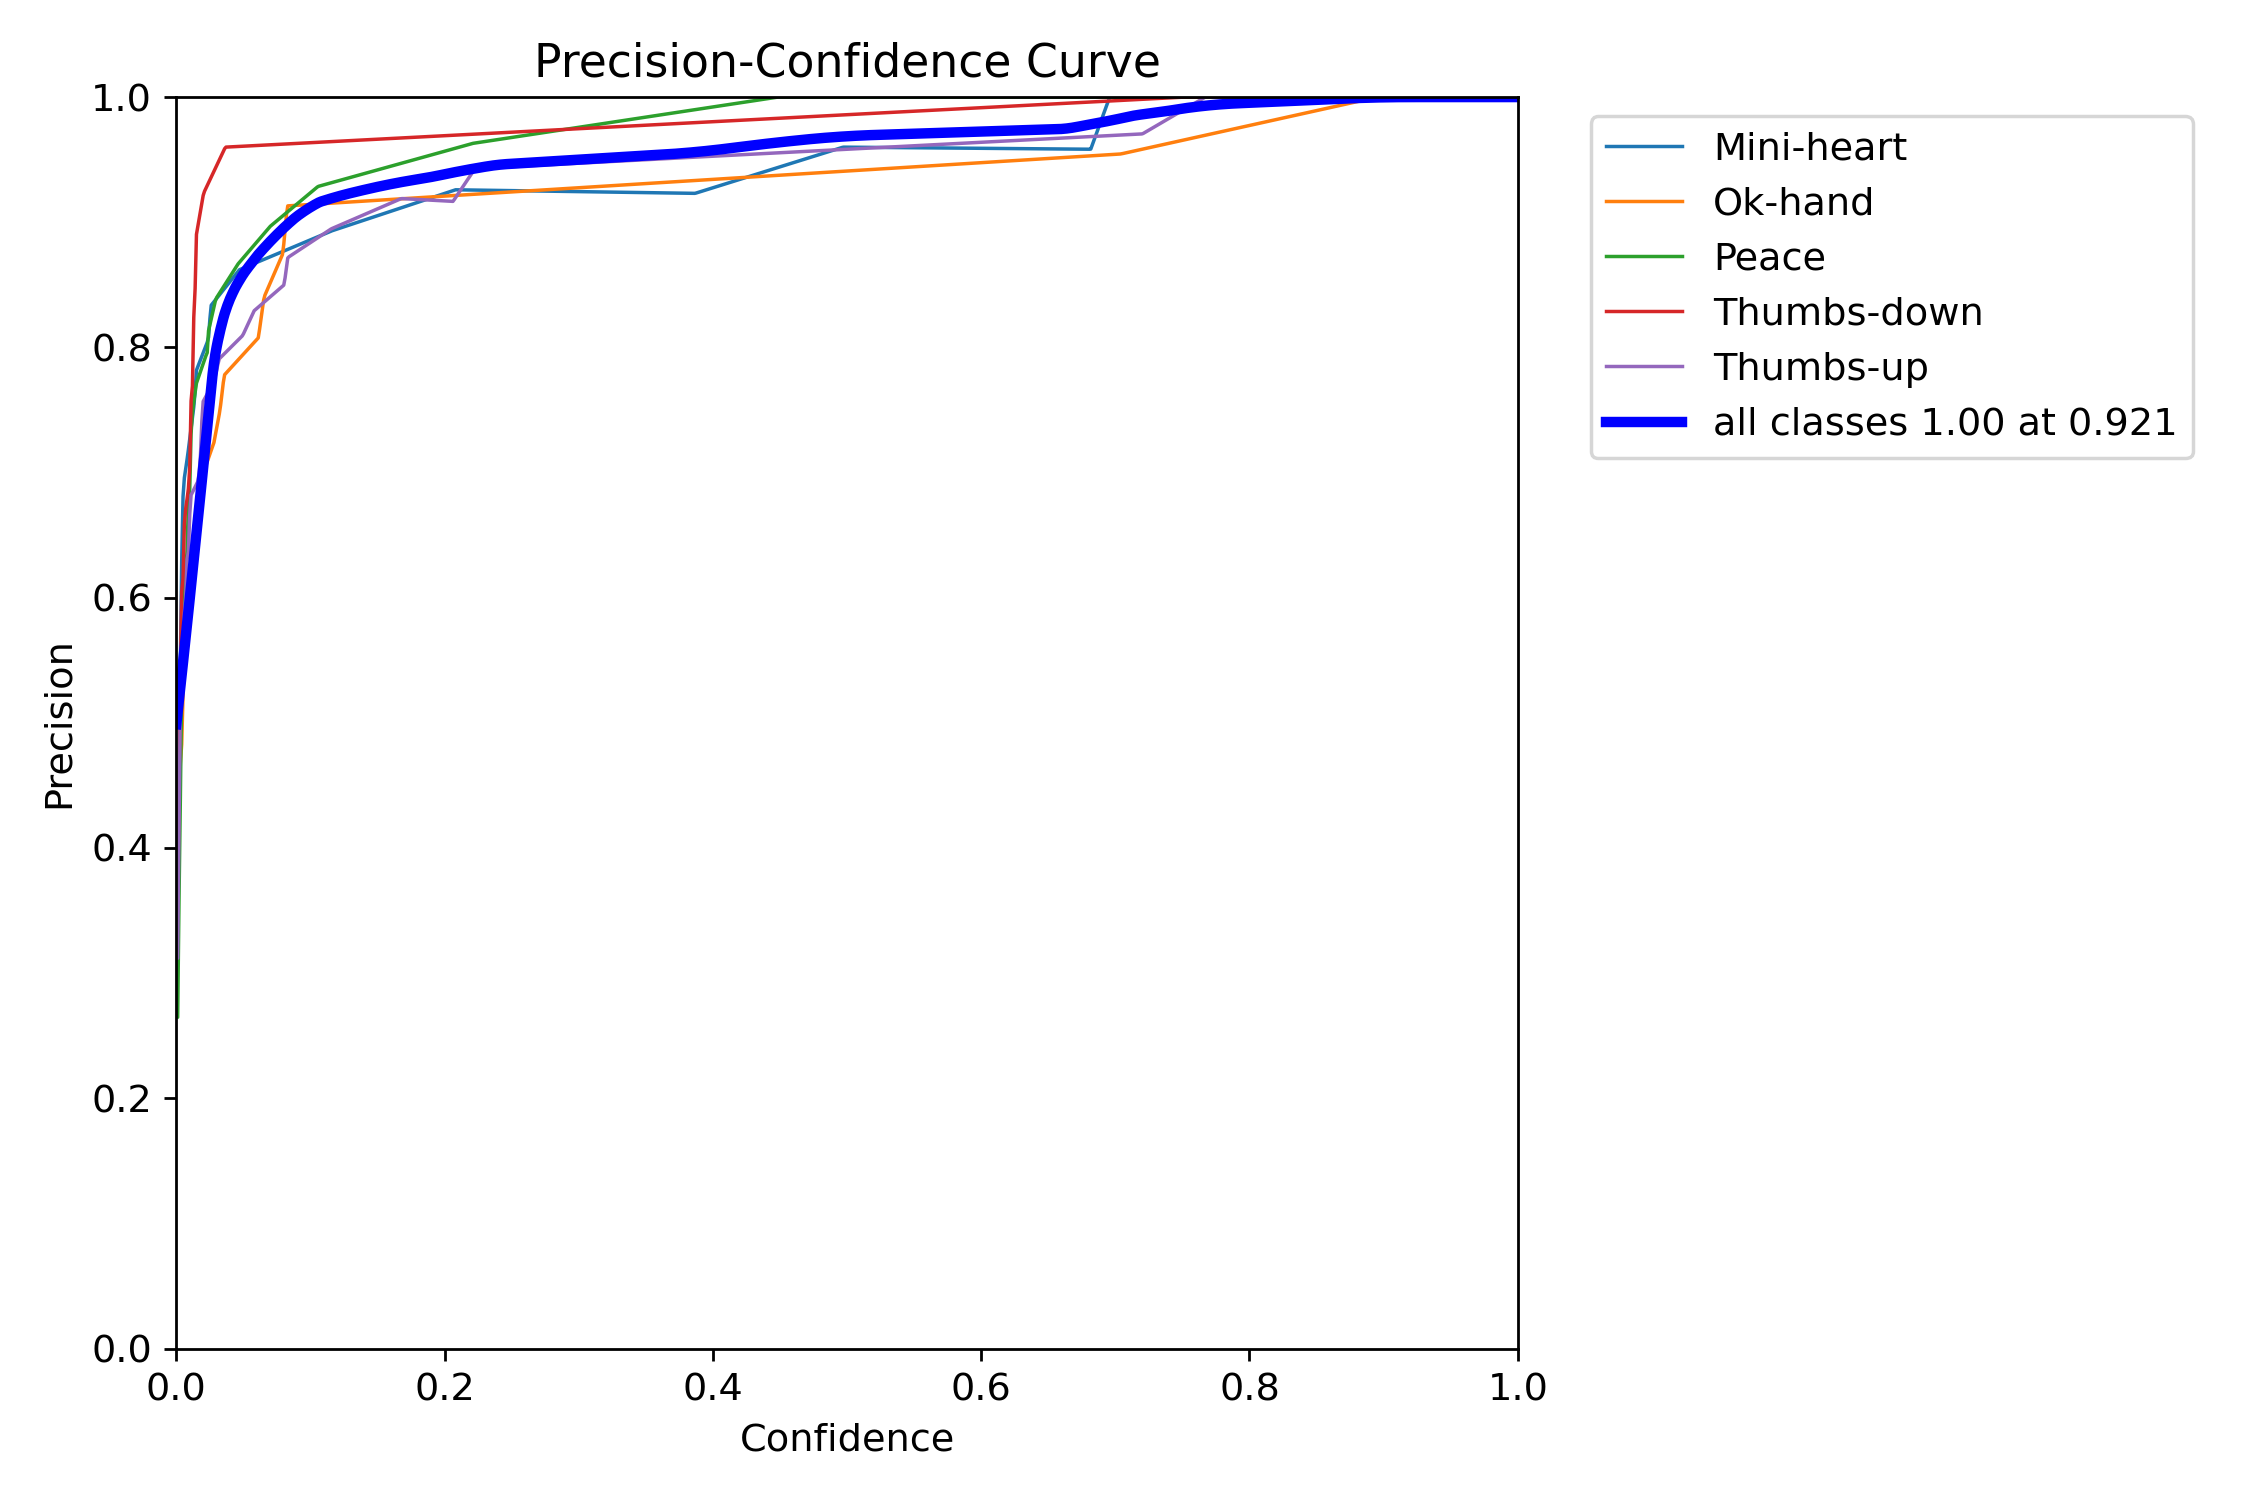

In [ ]:
Image(filename='runs/detect/star-finger-yolov8n_50e/P_curve.png', width=900)

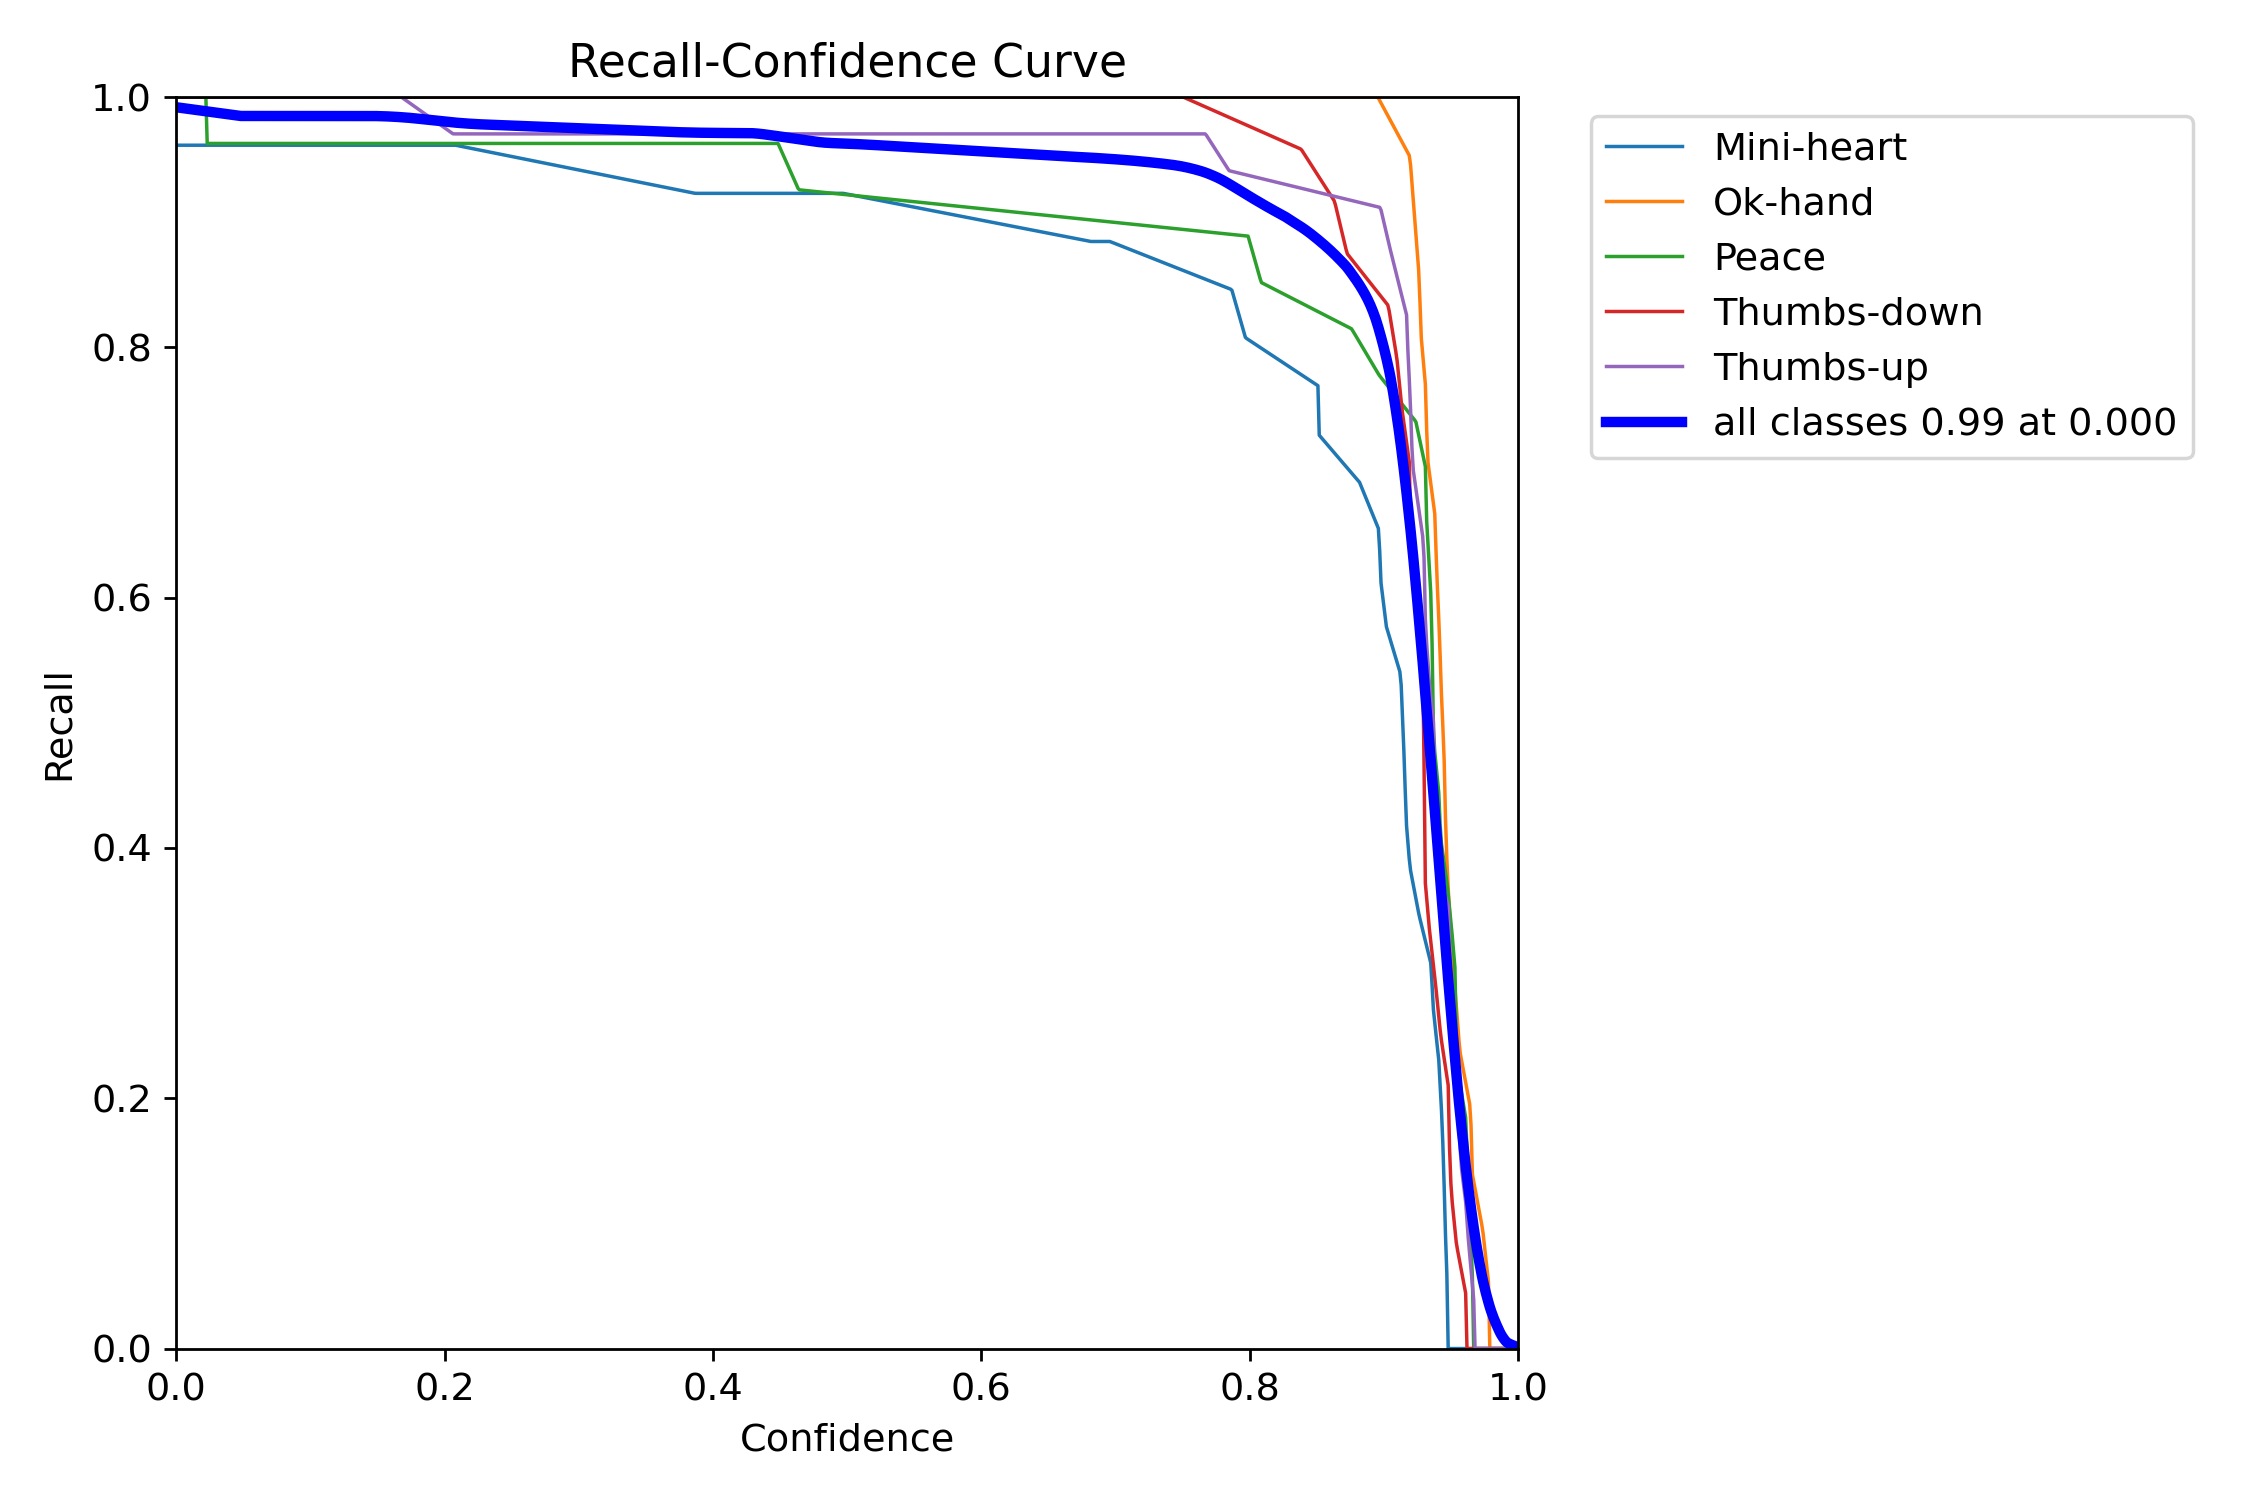

In [ ]:
Image(filename='runs/detect/star-finger-yolov8n_50e/R_curve.png', width=900)

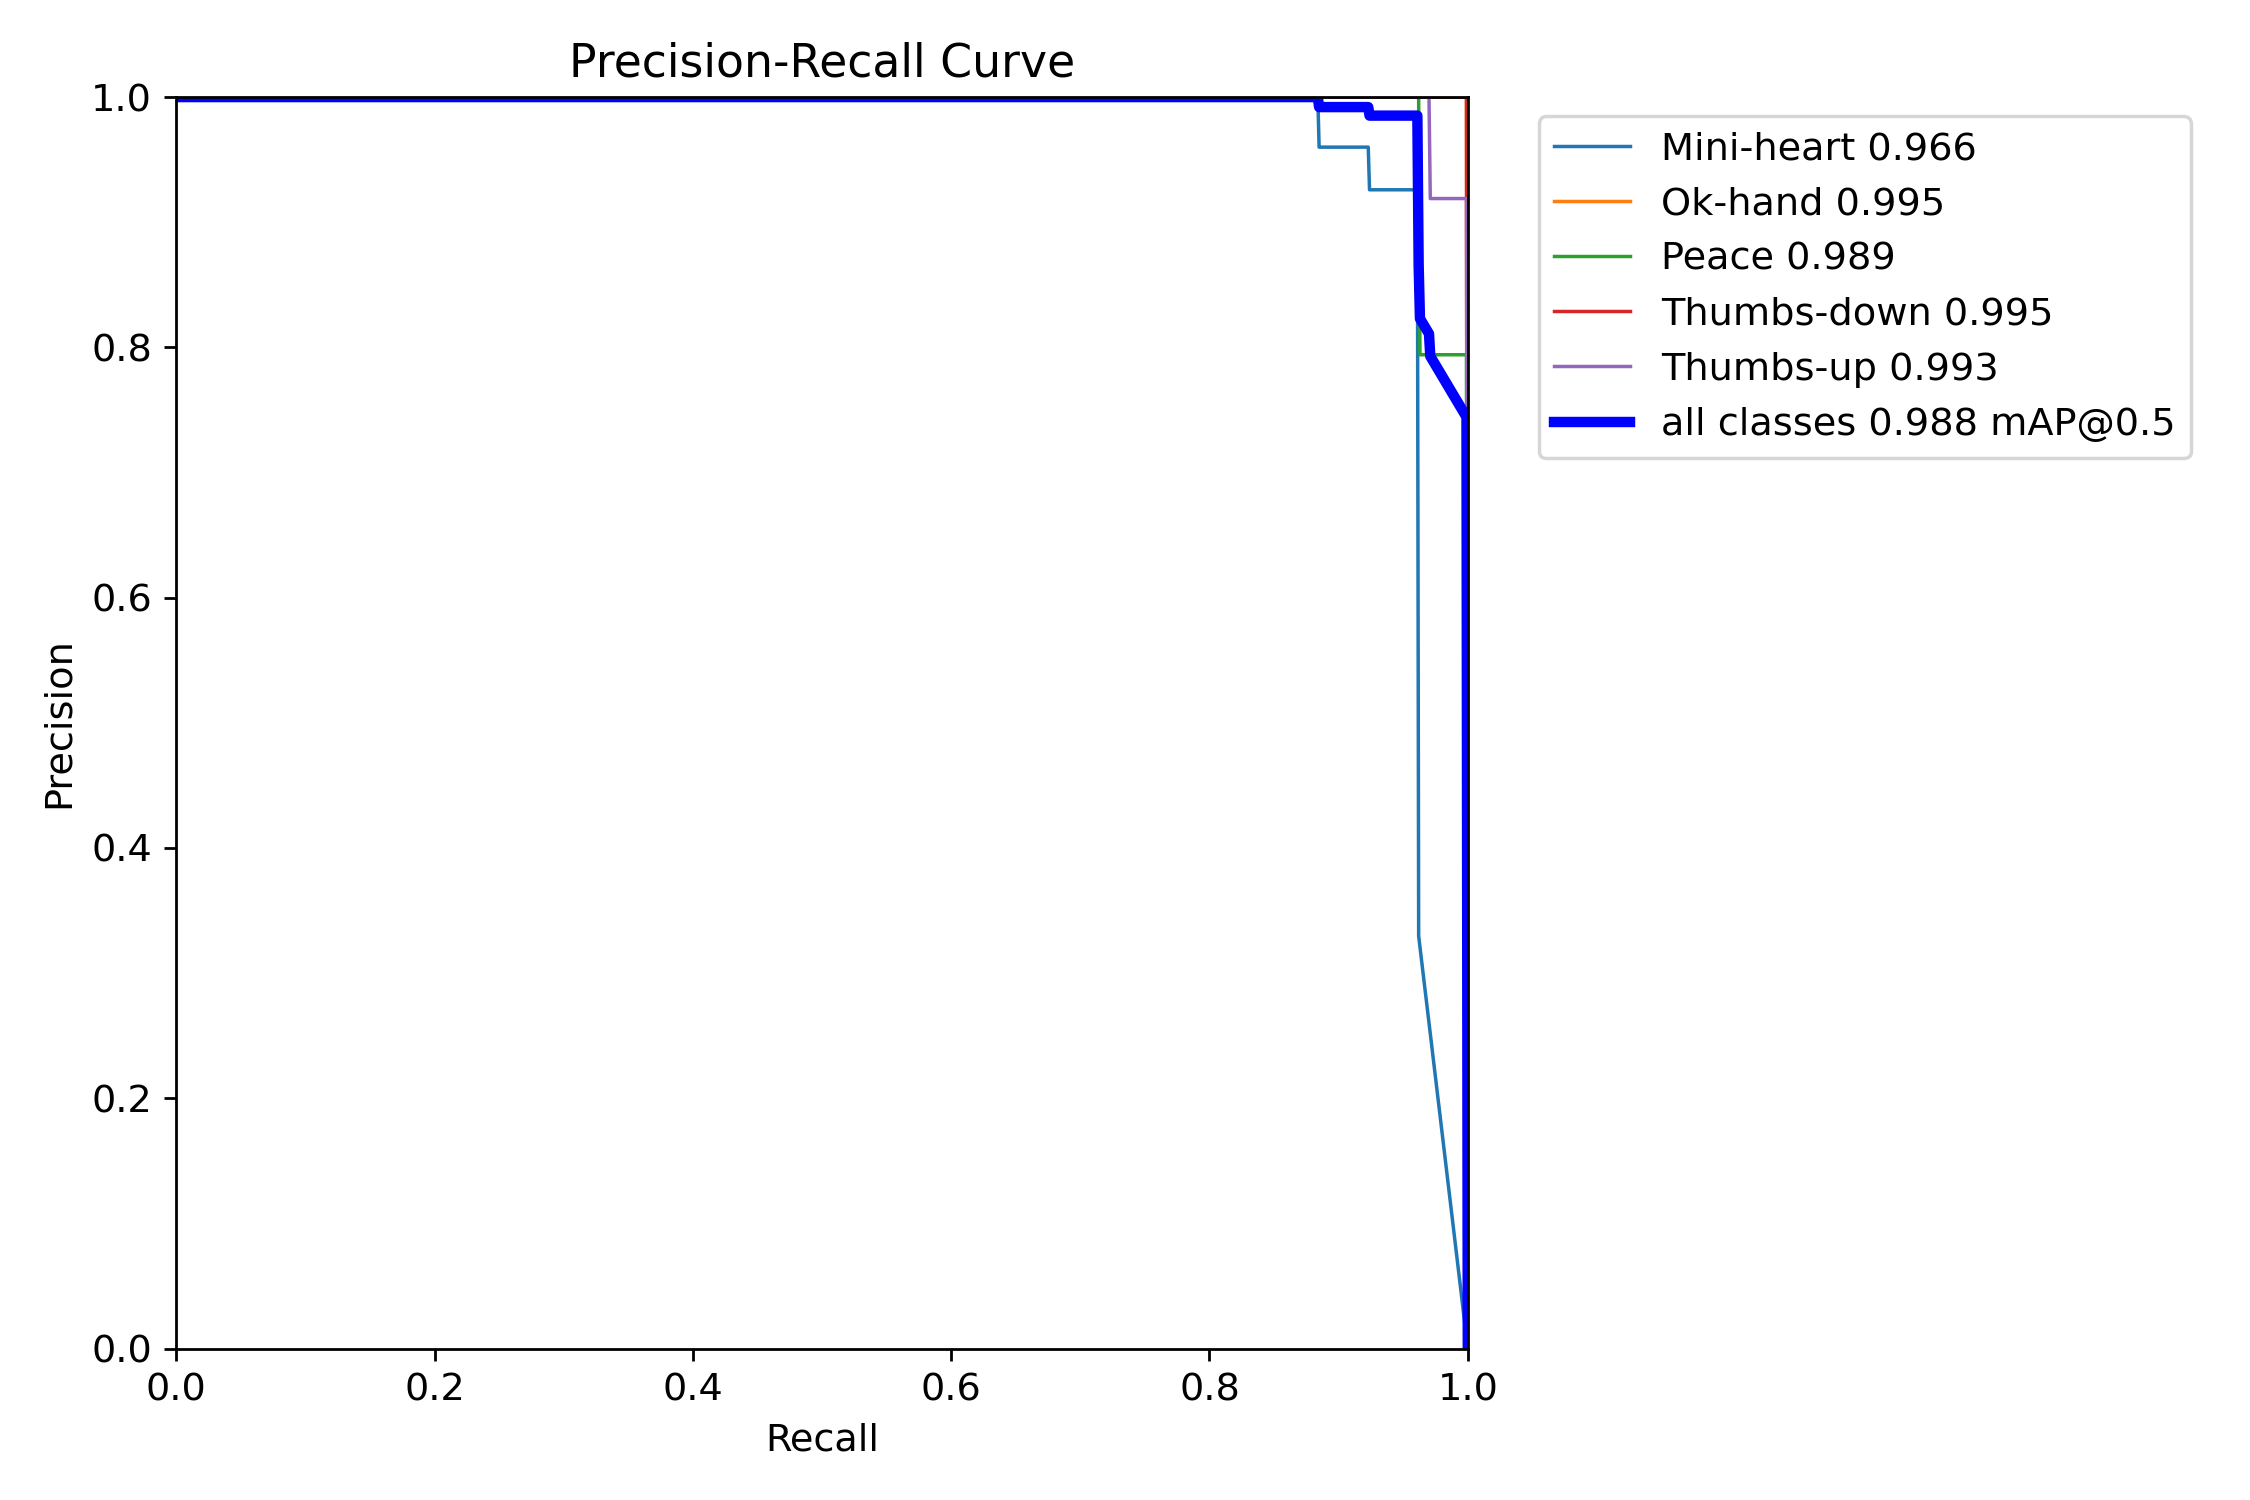

In [ ]:
Image(filename='runs/detect/star-finger-yolov8n_50e/PR_curve.png', width=900)

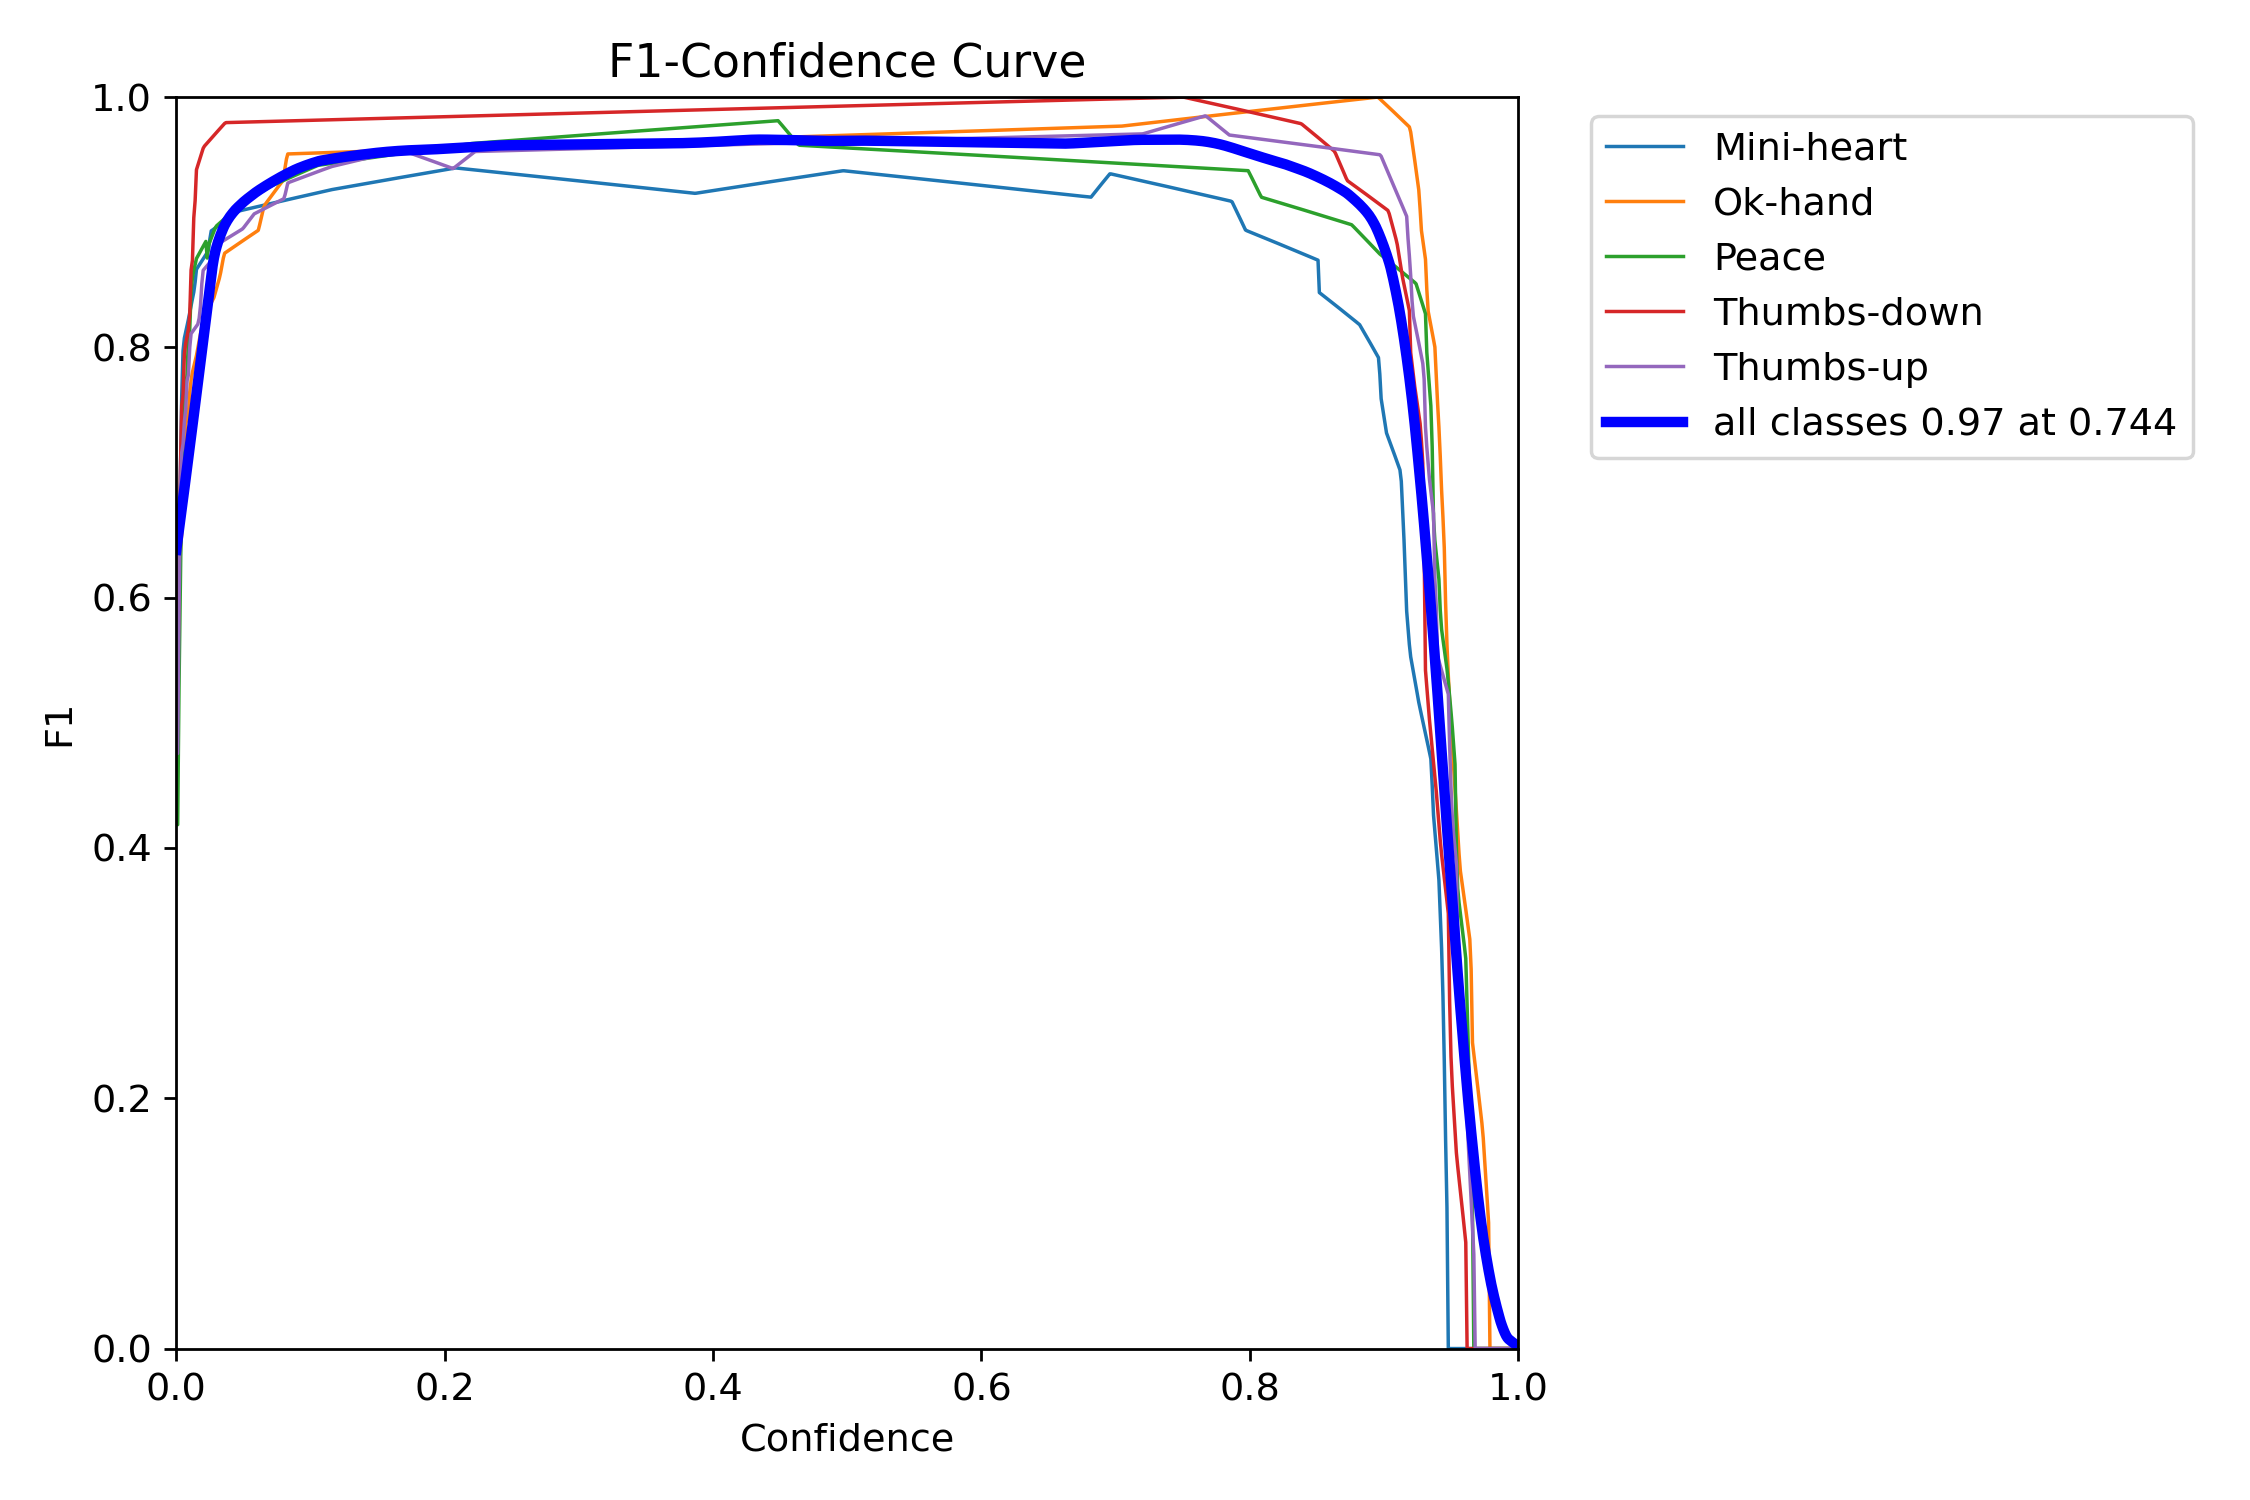

In [ ]:
Image(filename='runs/detect/star-finger-yolov8n_50e/F1_curve.png', width=900)

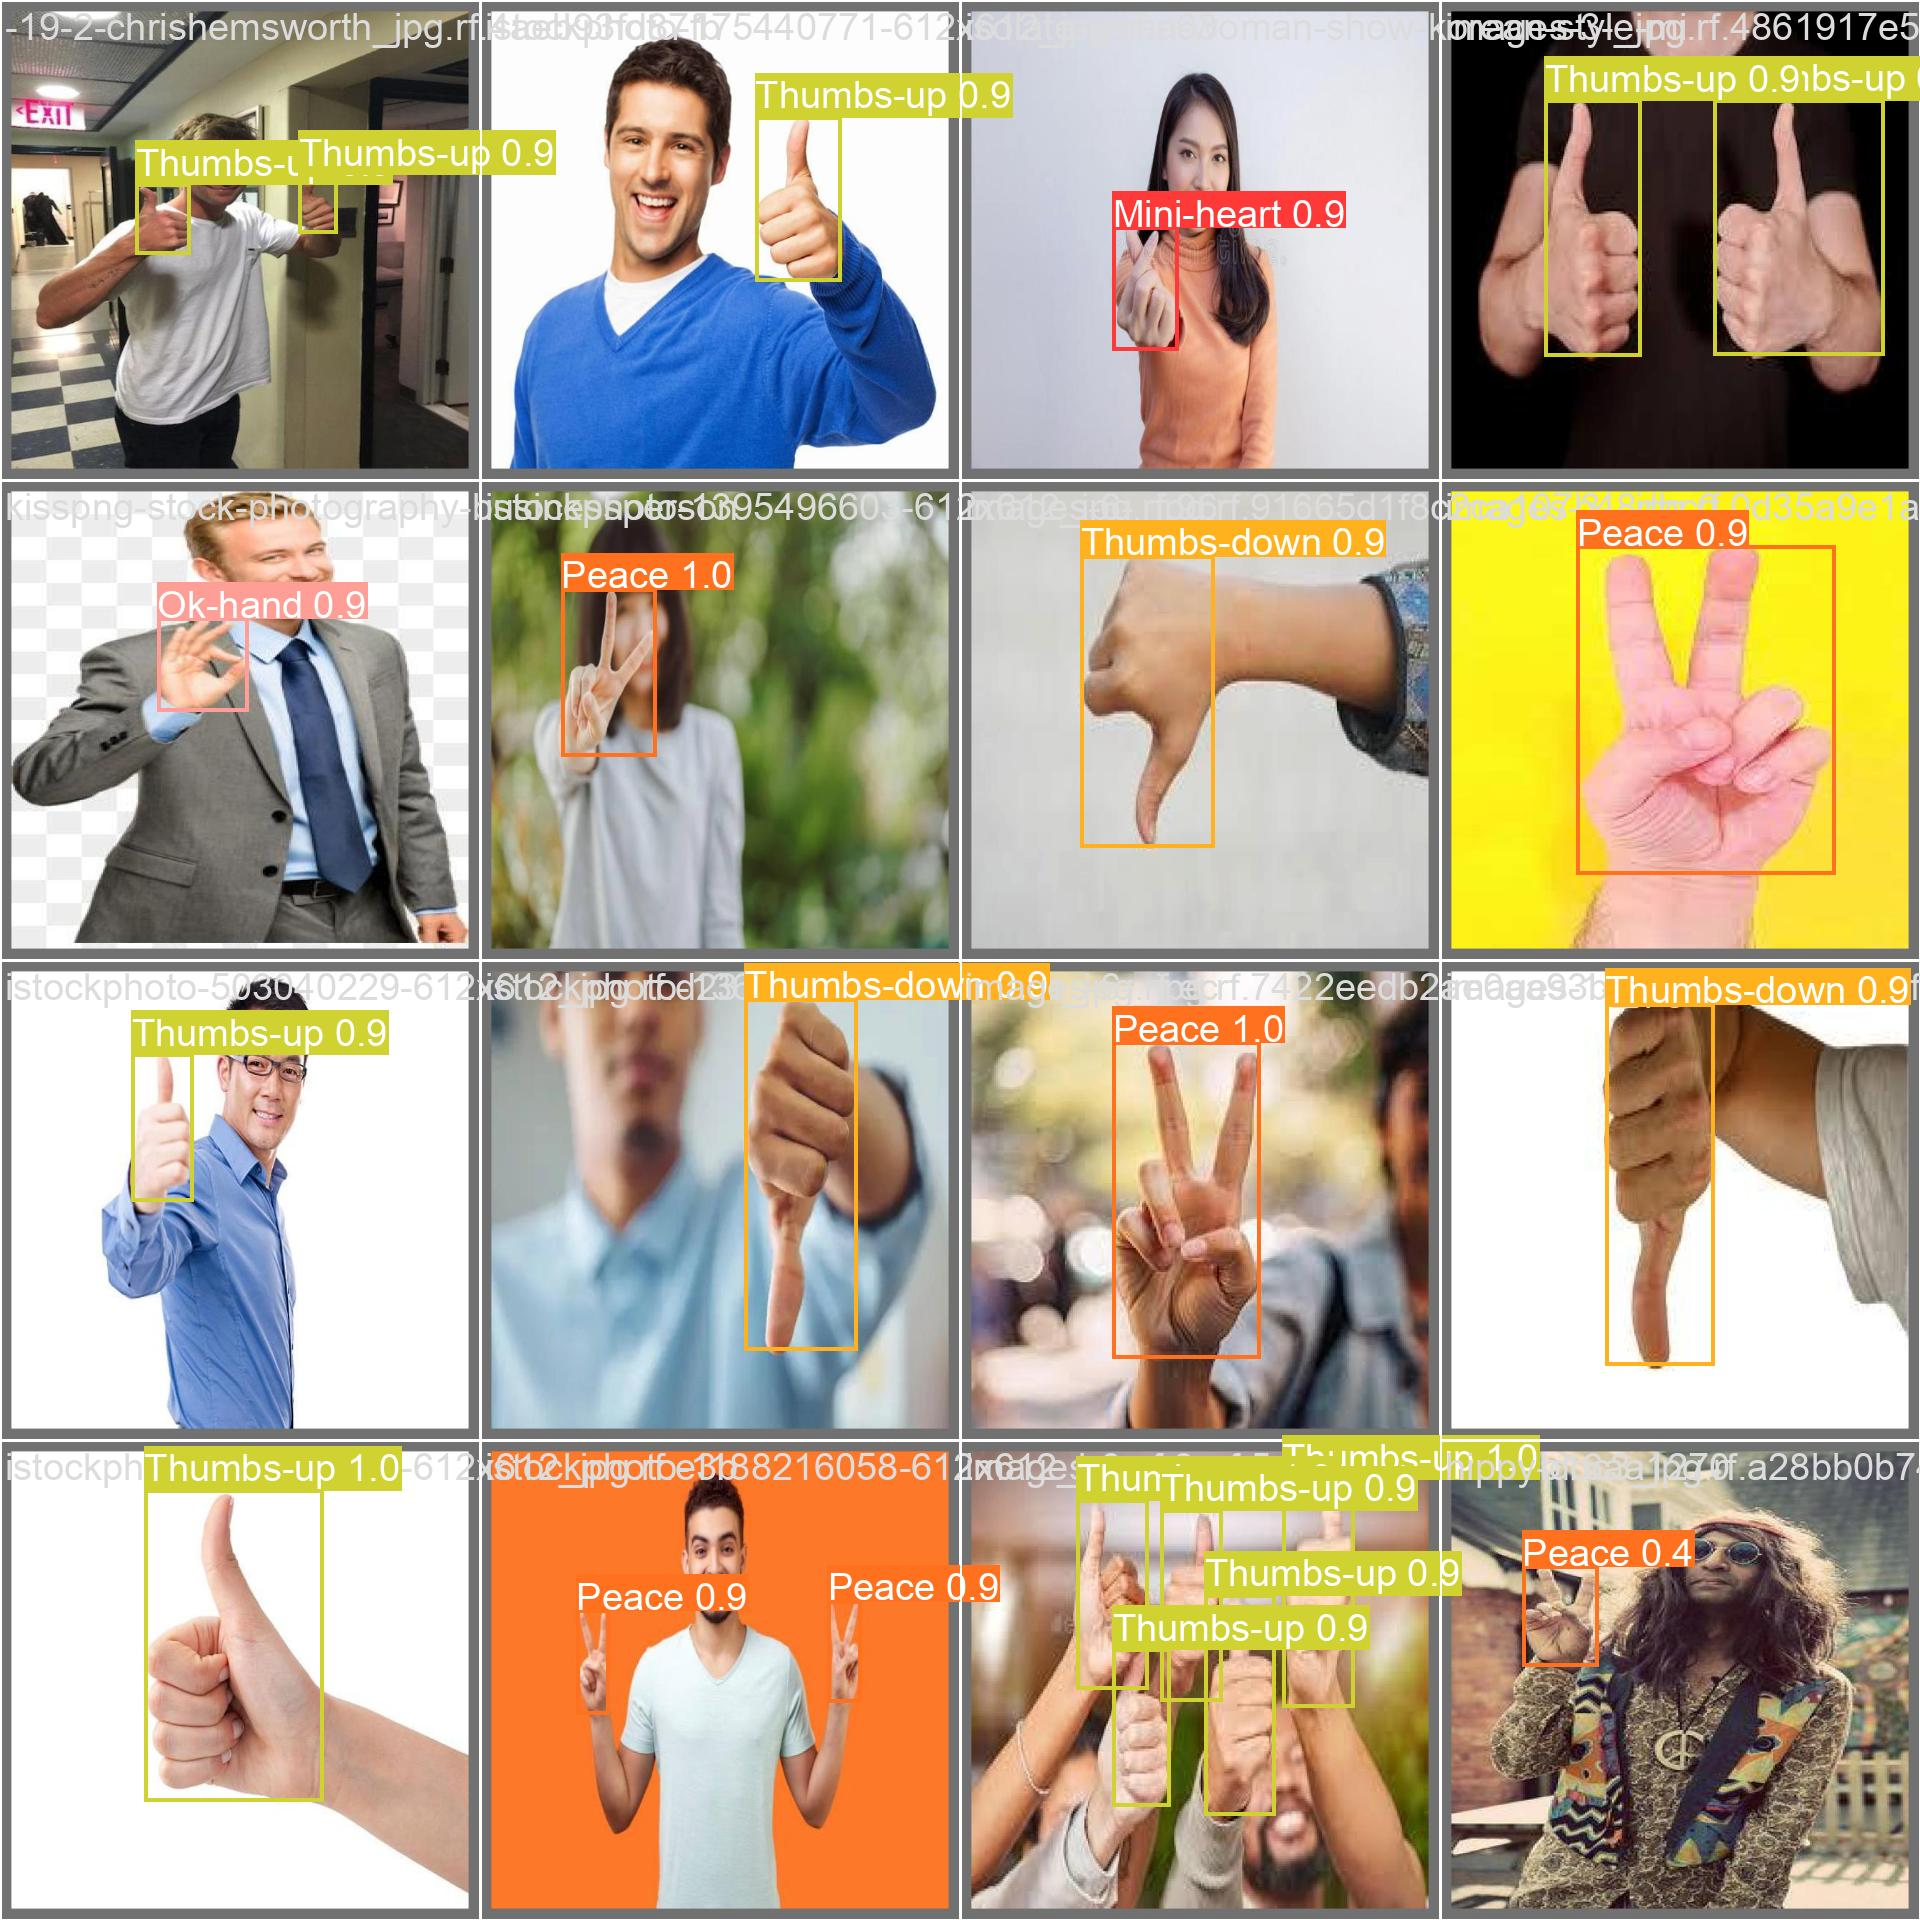

In [ ]:
Image(filename='runs/detect/star-finger-yolov8n_50e/val_batch0_pred.jpg', width=900)

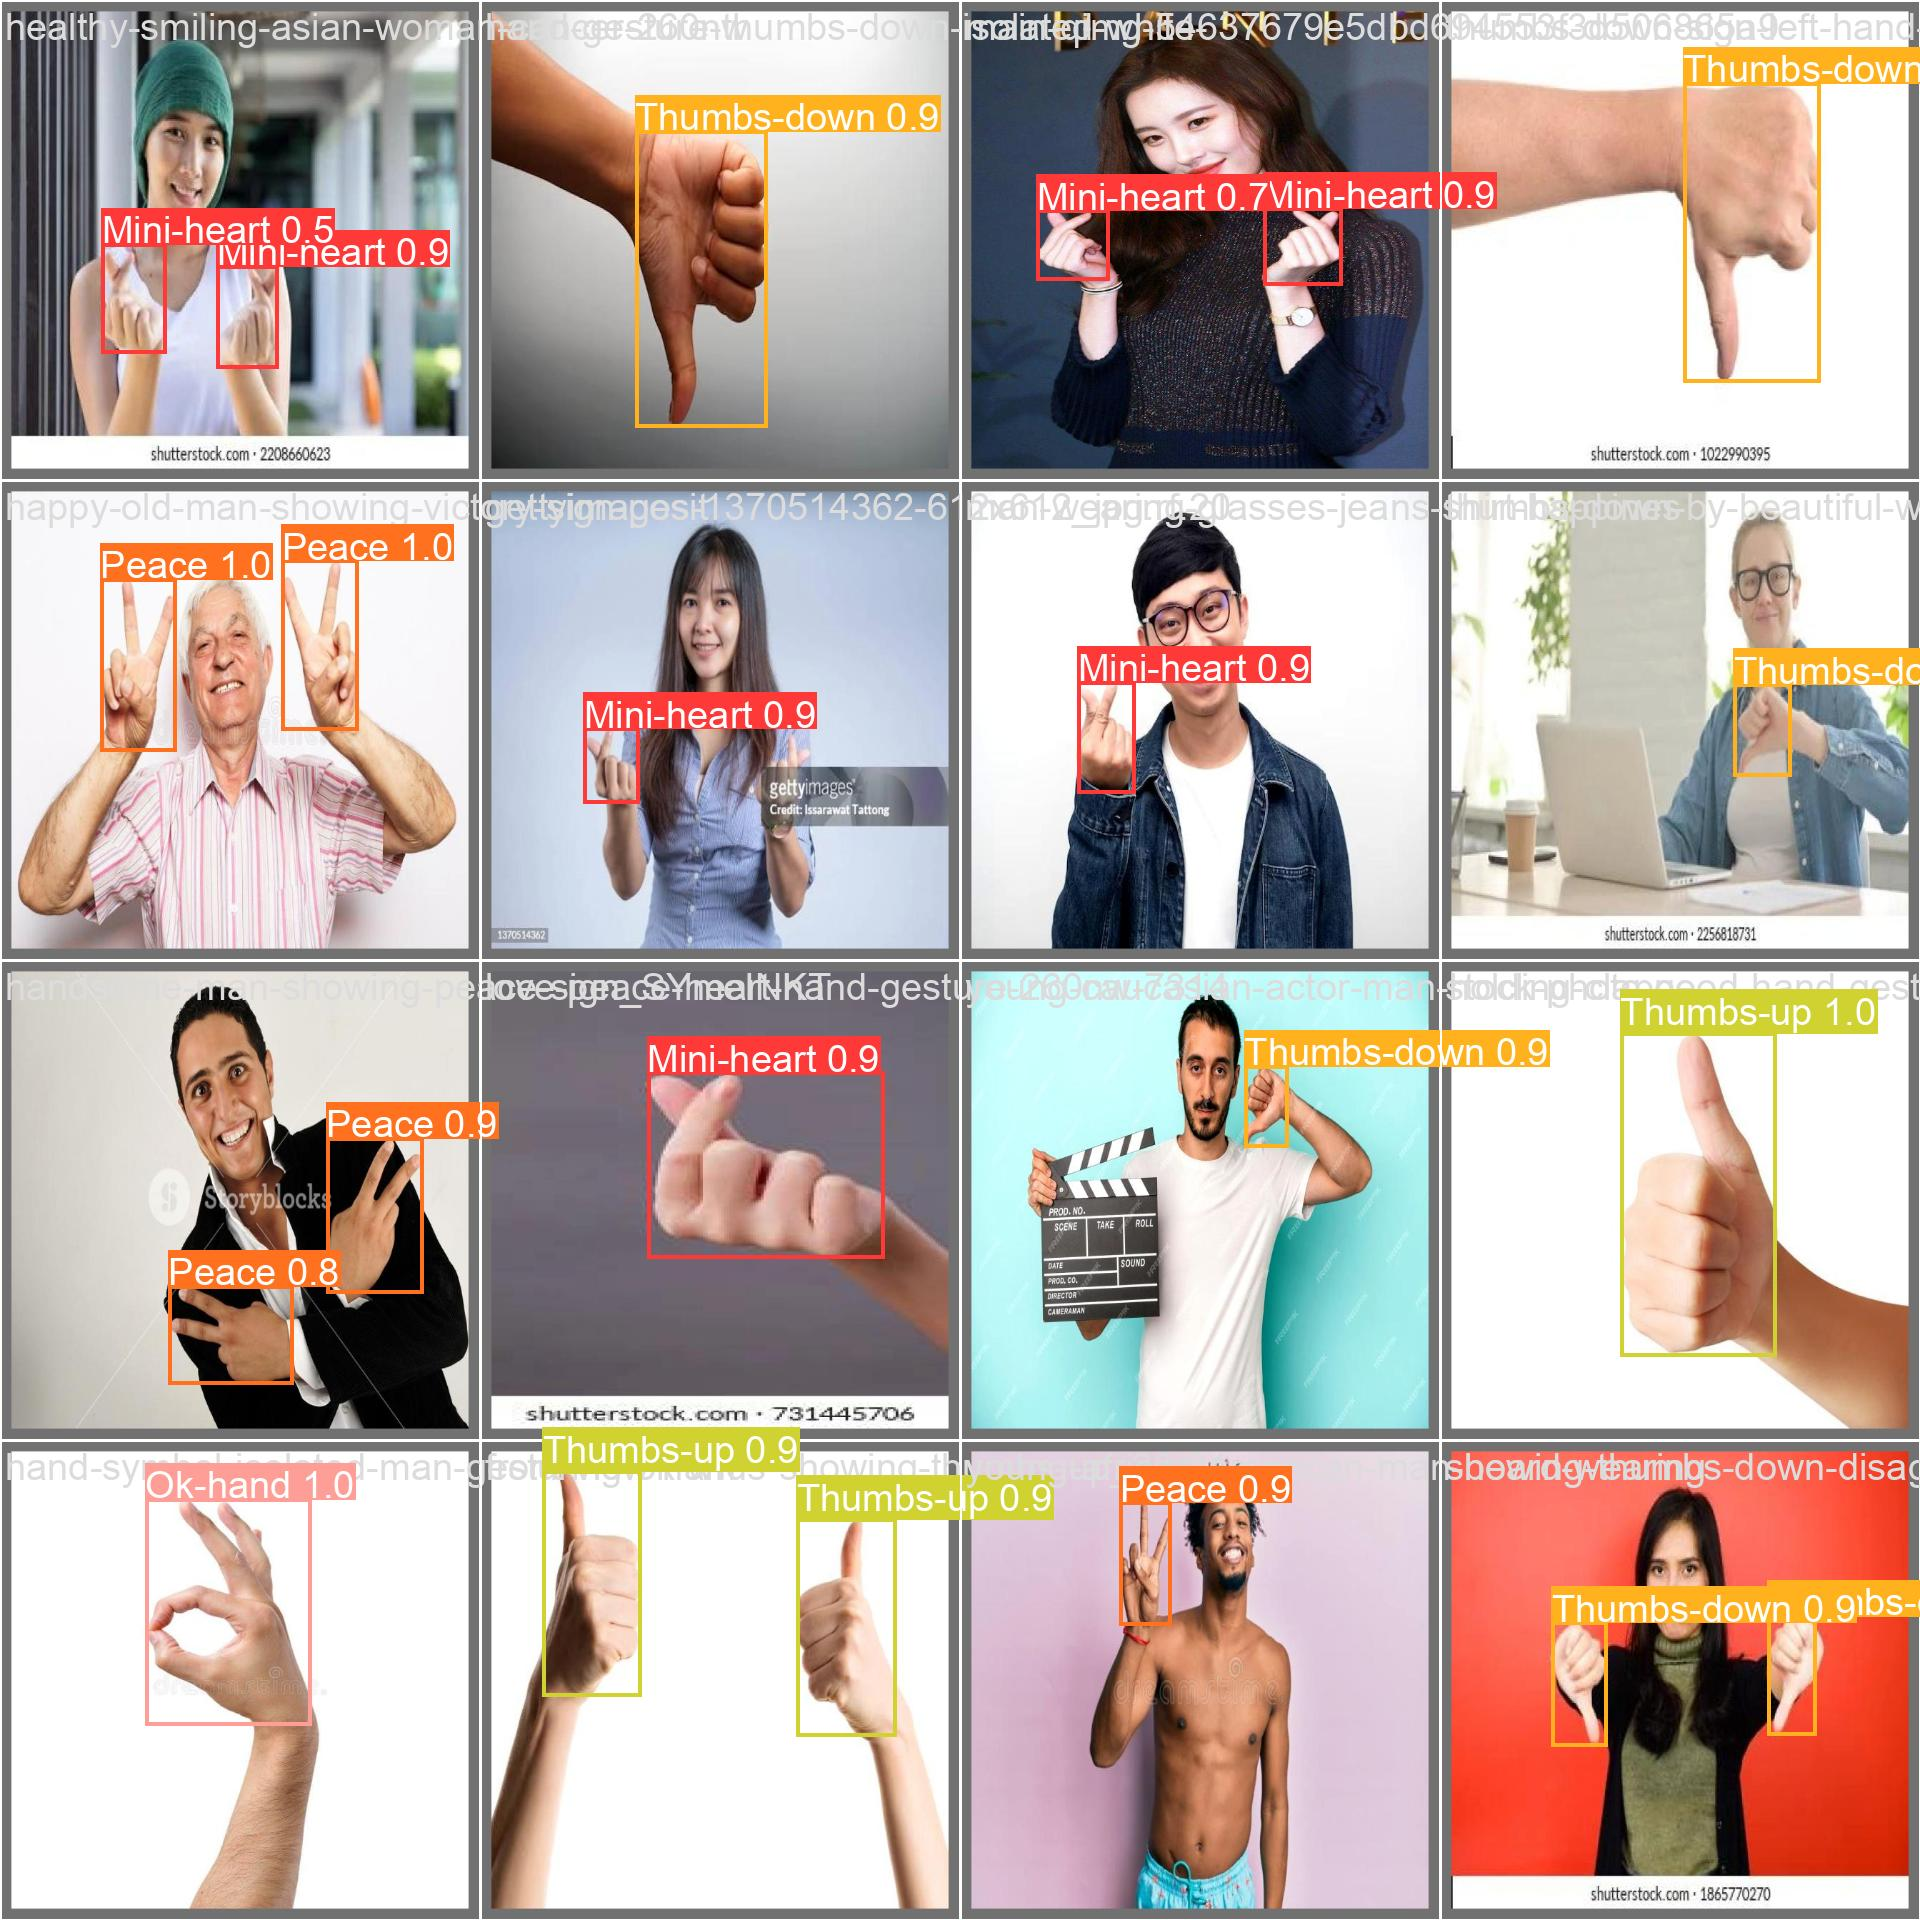

In [ ]:
Image(filename='runs/detect/star-finger-yolov8n_50e/val_batch1_pred.jpg', width=900)

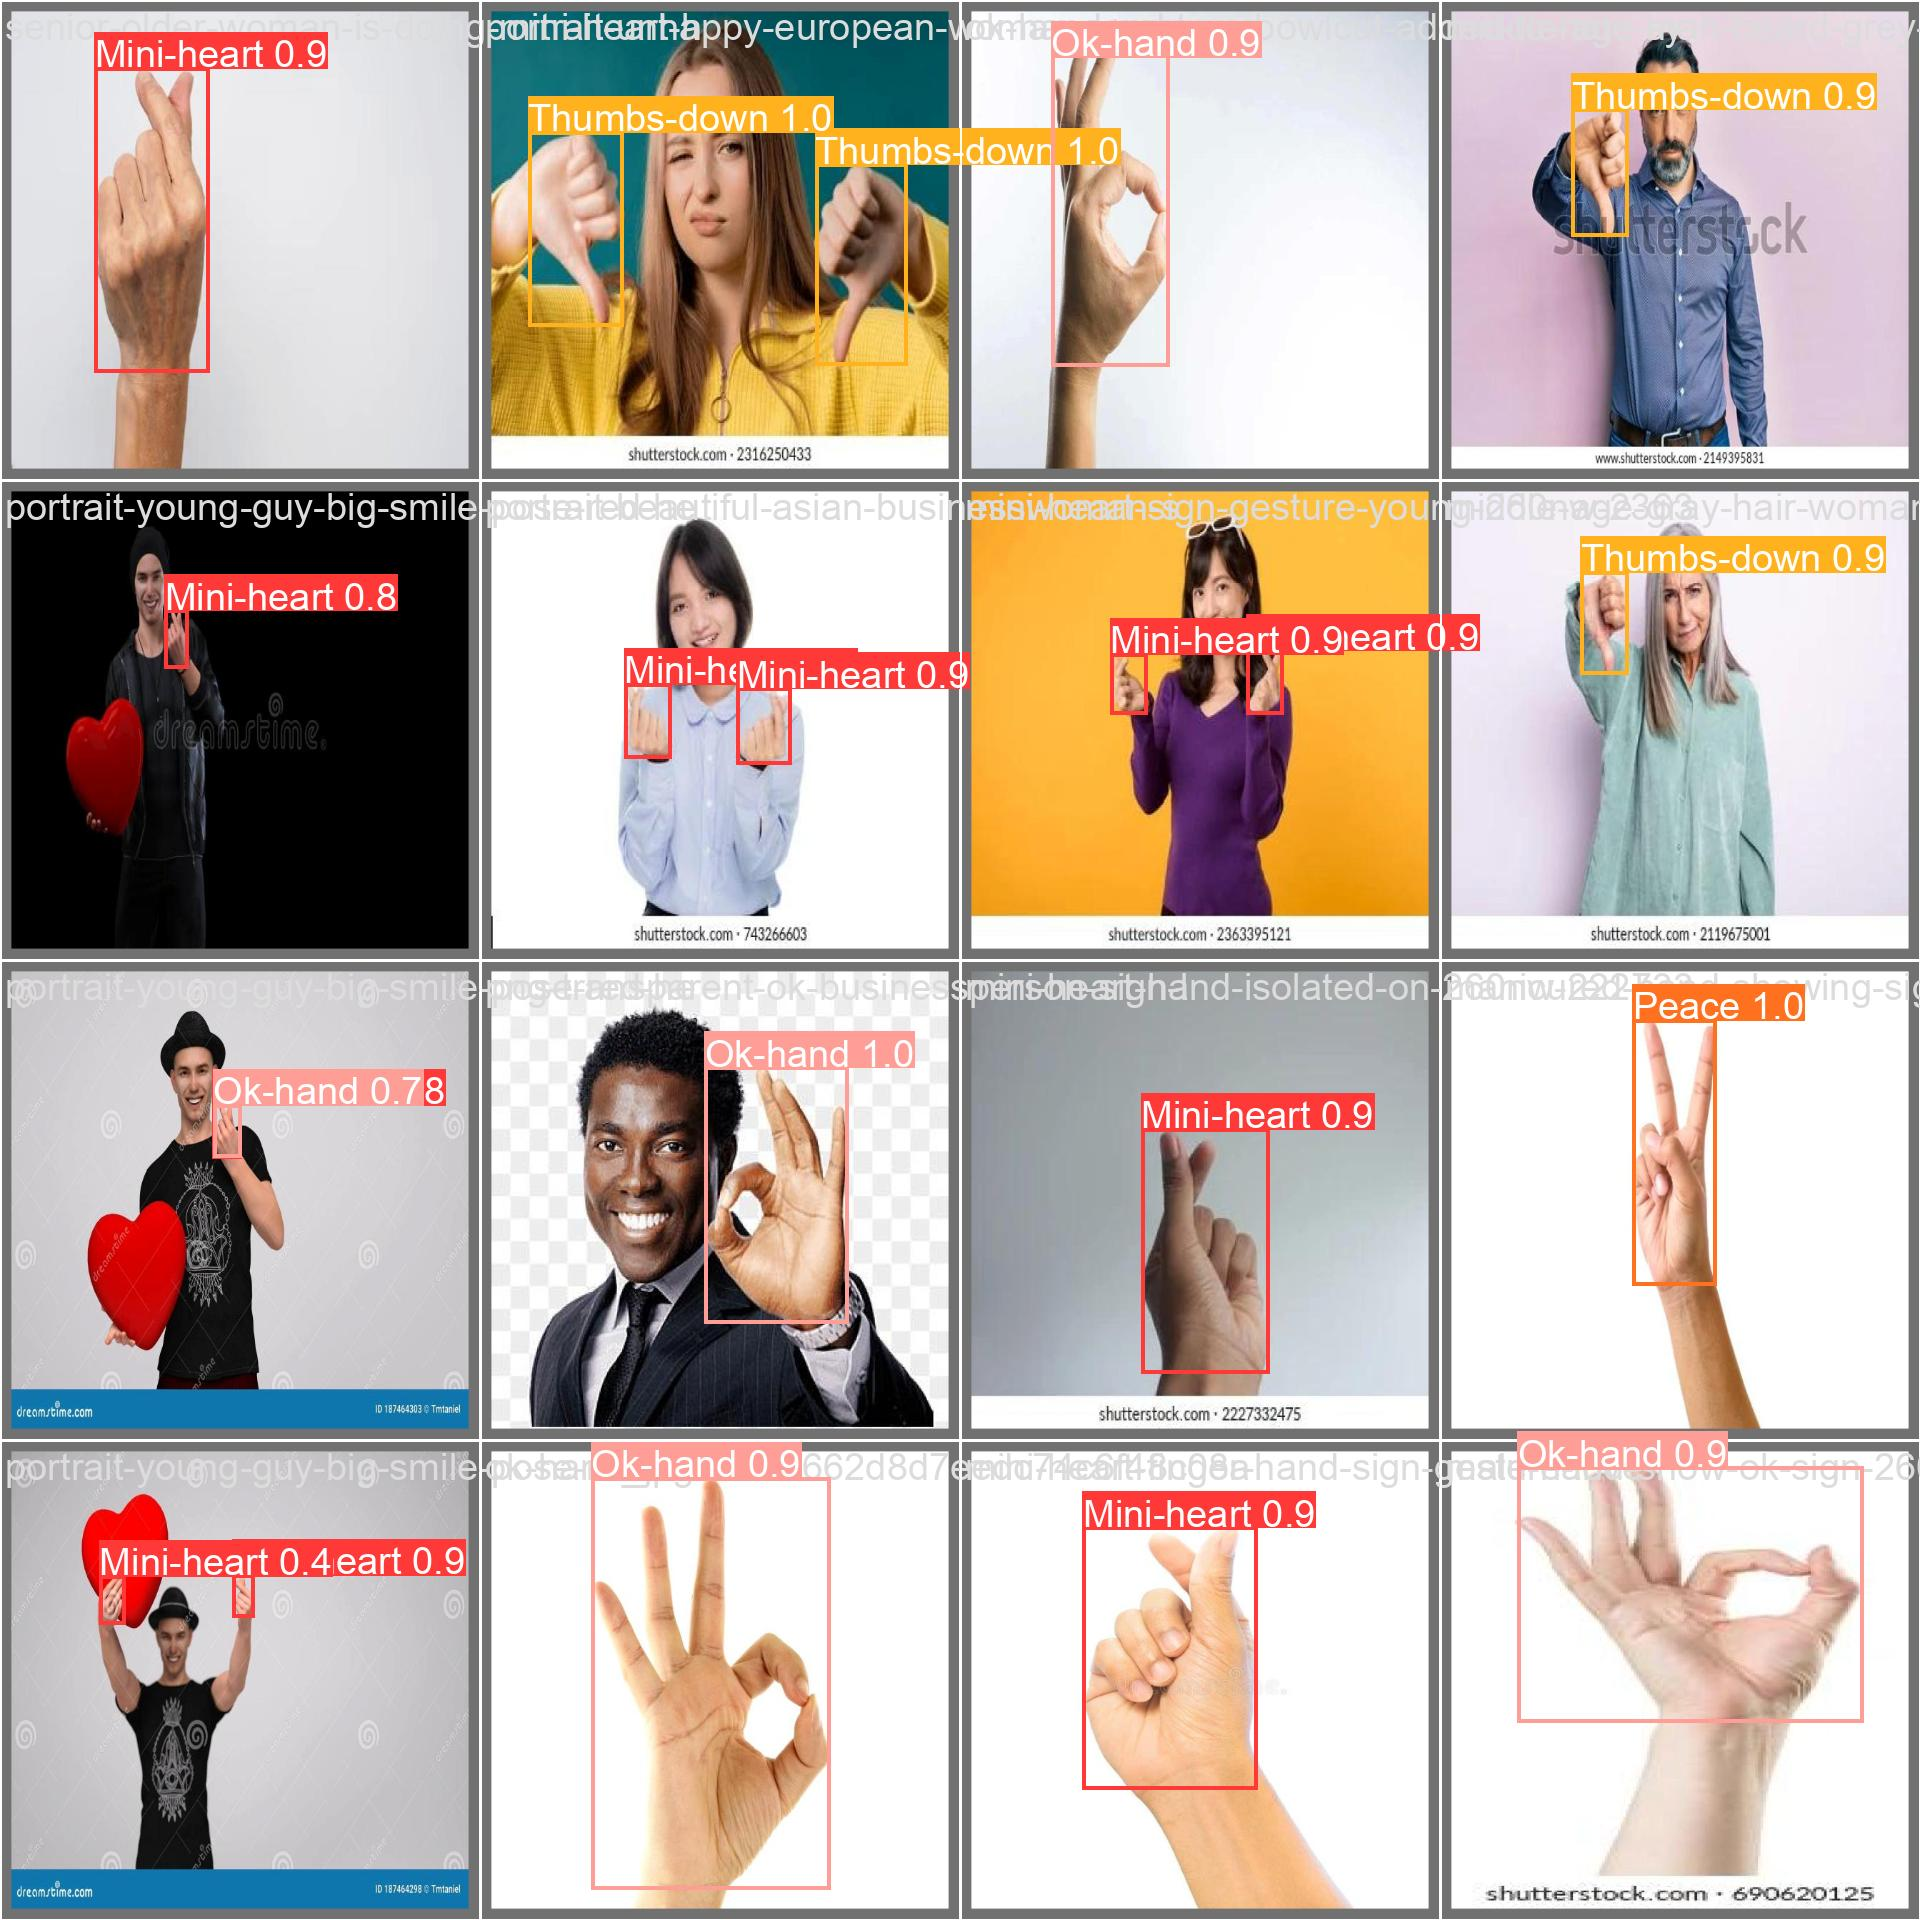

In [ ]:
Image(filename='runs/detect/star-finger-yolov8n_50e/val_batch2_pred.jpg', width=900)

# ลองใช้ model

In [ ]:
import os

os.chdir('/content/gdrive/MyDrive/032-Lab09/star-finger-Dataset')
!pwd

/content/gdrive/MyDrive/032-Lab09/star-finger-Dataset


In [ ]:
!ls

data.yaml  README.dataset.txt  README.roboflow.txt  runs  test	train  valid  yolov8n.pt


In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/star-finger-yolov8n_50e/weights/best.pt")

In [ ]:
path_test_images = "../test-images"

files = os.listdir(path_test_images)
files

['tu_mini_heart.jpg',
 'ok_hand.jpg',
 'vergil_thumb_up.jpg',
 'girl_peace.jpg',
 'thumbs_down.jpg',
 'ishowspeed_peace.jpg',
 'converted']

In [ ]:
path_files = [os.path.join(path_test_images, file) for file in files]
path_files

['../test-images/tu_mini_heart.jpg',
 '../test-images/ok_hand.jpg',
 '../test-images/vergil_thumb_up.jpg',
 '../test-images/girl_peace.jpg',
 '../test-images/thumbs_down.jpg',
 '../test-images/ishowspeed_peace.jpg',
 '../test-images/converted']

**resize images (Optional)**

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io

path_converted = os.path.join(path_test_images, "converted")

if not os.path.exists(path_converted):
  os.makedirs(path_converted)

width = 640

for path_file in path_files:
  img = io.imread(path_file)
  original_height, original_width = img.shape[:2]
  height = int(width * original_height / original_width)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img =  cv2.resize(img, [width,height], interpolation = cv2.INTER_CUBIC)
  path_save = os.path.join(path_converted, os.path.basename(path_file))
  cv2_imshow(img)
  cv2.imwrite(path_save, img)

In [ ]:
files = os.listdir(path_converted)
path_files = [os.path.join(path_converted, file) for file in files]

results = model(path_files)


0: 640x640 2 Mini-hearts, 1: 640x640 1 Ok-hand, 2: 640x640 1 Thumbs-up, 3: 640x640 1 Peace, 4: 640x640 2 Thumbs-downs, 5: 640x640 1 Peace, 55.6ms
Speed: 3.0ms preprocess, 9.3ms inference, 123.3ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
import cv2
import math
from skimage import io
from google.colab.patches import cv2_imshow

path_predict_result = "../predict_results"

if not os.path.exists(path_predict_result):
  os.makedirs(path_predict_result)

OBJnames = model.names

for item in results:
  img = io.imread(item.path)

  for region in item:
    boxes = region.boxes
    for box in boxes:
       # finding bounding box
      x1, y1, x2, y2 = box.xyxy[0]
      x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)  # convert to int values
      # drawing box into object on webcam
      cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 255), 3)
      # calculator confidence value and display
      confidence = math.ceil((box.conf[0] * 100)) / 100
      cls = int(box.cls[0])
      imgorg = [x1, y1]
      font = cv2.FONT_HERSHEY_SIMPLEX
      fontScale = .8
      color = (255, 0, 0)
      thickness = 2
      cv2.putText(img, OBJnames[cls] + " " + str(round(confidence, 1)), imgorg, font, fontScale, color, thickness)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  path_save = os.path.join(path_predict_result, os.path.basename(item.path))
  cv2_imshow(img)
  cv2.imwrite(path_save, img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!ls ../test-videos/test-video.mov

../test-videos/test-video.mov


In [ ]:
path_video = '../test-videos/test-video.mov'

model.track(source=path_video, save=True, project="../predict_results/", name="")

Link video: https://drive.google.com/file/d/11sJkdO2HbnCTF1YGTkjWB6_0k1LdVs-R/view?usp=sharing